In [4]:
import time
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt
from konlpy.tag import Mecab
# from khaiii import KhaiiiApi
import numpy as np
from collections import Counter
import re
import networkx as nx

from wordcloud import WordCloud
from PIL import ImageFont, ImageDraw

import matplotlib.pyplot as plt

from matplotlib import font_manager

import warnings
warnings.simplefilter("ignore")

In [6]:
# 재해개요 Data Load
df = pd.read_excel("fire_data.xlsx")
df

,연번,기준연월,발생형태_소,재해개요
0,43,201212,화재,주조사업장내 가우징 작업장에서 롤초크 안쪽에 붙어있는 소착을 제거하기 위해서 가우징...
1,120,201212,폭발·파열,[비보고 사유] 가스주입실에서 이송대기중 질소가스통 체결부위 불량으로 폭발되면서 파...
2,197,201212,폭발·파열,[비보고 사유] 재해 발생시 산업재해발생 보고를 해야 한다는 사실을 알지 못함 [조...
3,394,201212,폭발·파열,[비보고 사유] 재해자가 본인 실수로 다쳤으므로 본인이 알아서 한다고 하여 방치한 ...
4,478,201212,폭발·파열,[비보고 사유] 공상처리 [조사자 견해] 유성기업(주)에서 제출한 공상처리 내역 및...
...,...,...,...,...
1814,495010,201712,화재,상기일 상기인 호스를 연결하기 위해 녹이는 과정에서 사고가 발생.(신나에 불이 옮겨...
1815,495567,201712,화재,12월 07일 오전07시경 제품(무거리) 보관용기로 사용하기 위해 폐드럼통 뚜껑 산...
1816,495930,201712,폭발·파열,2017년 12월 12일 14시 48분경 회사 공장동에서 기계시운전을 하면서 온도상...
1817,496127,201712,화재,2017년 12월 18일 13시경 부산시 강서구 송정동 소재 부광화학공업(주) 본공...


In [7]:
df = df.drop_duplicates(['재해개요'], keep='first')
df

,연번,기준연월,발생형태_소,재해개요
0,43,201212,화재,주조사업장내 가우징 작업장에서 롤초크 안쪽에 붙어있는 소착을 제거하기 위해서 가우징...
1,120,201212,폭발·파열,[비보고 사유] 가스주입실에서 이송대기중 질소가스통 체결부위 불량으로 폭발되면서 파...
2,197,201212,폭발·파열,[비보고 사유] 재해 발생시 산업재해발생 보고를 해야 한다는 사실을 알지 못함 [조...
3,394,201212,폭발·파열,[비보고 사유] 재해자가 본인 실수로 다쳤으므로 본인이 알아서 한다고 하여 방치한 ...
4,478,201212,폭발·파열,[비보고 사유] 공상처리 [조사자 견해] 유성기업(주)에서 제출한 공상처리 내역 및...
...,...,...,...,...
1813,494817,201712,폭발·파열,사업장내 개발공실 옆 외부에서 민수 신호기 개발용 추진제 작업 중 고체추진제 홀 구...
1814,495010,201712,화재,상기일 상기인 호스를 연결하기 위해 녹이는 과정에서 사고가 발생.(신나에 불이 옮겨...
1815,495567,201712,화재,12월 07일 오전07시경 제품(무거리) 보관용기로 사용하기 위해 폐드럼통 뚜껑 산...
1816,495930,201712,폭발·파열,2017년 12월 12일 14시 48분경 회사 공장동에서 기계시운전을 하면서 온도상...


In [8]:
df_화재 = df[df["발생형태_소"] == "화재"]
df_폭파 = df[df["발생형태_소"] == "폭발·파열"]
화재_post = df_화재.get("재해개요")
폭파_post = df_폭파.get("재해개요")
폭파_post
df_화재

,연번,기준연월,발생형태_소,재해개요
0,43,201212,화재,주조사업장내 가우징 작업장에서 롤초크 안쪽에 붙어있는 소착을 제거하기 위해서 가우징...
5,636,201212,화재,[비보고 사유] 약 10일간의 입원치료로서 병원비를 회사에서 지급하였고 퇴원 후 조...
6,672,201212,화재,[비보고 사유] 개인 휴가중에 발생한 개인적 업무를 보다 발생한 사고라서 생각하여 ...
7,963,201212,화재,[비보고 사유] 이천만원 이하 공사인 관계로 산재처리 되지 않는다고 하여서 [조사자...
8,1388,201212,화재,[비보고 사유] 최초에 4일간의 통원치료 진단을 받았으나 가료 중 상처부위가 덧나 ...
...,...,...,...,...
1807,491279,201712,화재,2017. 11. 8. 14:40경 경기도 파주시 파주읍 정문로 720(부곡리497...
1810,493755,201712,화재,2017. 11. 22. 13:44.경 그라비아인쇄기 가동을 위한 준비작업을 하던더...
1814,495010,201712,화재,상기일 상기인 호스를 연결하기 위해 녹이는 과정에서 사고가 발생.(신나에 불이 옮겨...
1815,495567,201712,화재,12월 07일 오전07시경 제품(무거리) 보관용기로 사용하기 위해 폐드럼통 뚜껑 산...


In [9]:
# 불용어 정의
df_stopwords = pd.read_excel('stopwords.xlsx')
df_stopwords

,불용어
0,아
1,휴
2,아이구
3,아이쿠
4,아이고
...,...
1144,이용
1145,직원
1146,외부
1147,작업


In [10]:
# 명사부분 추출
sentence_list = []
morphs_list = []

tagger = Mecab()
sentence_nouns_list = []
for post in 화재_post:
    morphs_value = []
    for noun in tagger.nouns(post):
        if noun not in list(df_stopwords.get("불용어")):
            if len(noun) == 1:
                    noun = noun+'_'
            morphs_list.append(noun)

            morphs_value.append(noun)
    sentence_nouns_list.append(morphs_value)
sentence_nouns_list[0:10]

Exception: The MeCab dictionary does not exist at "/usr/local/lib/mecab/dic/mecab-ko-dic". Is the dictionary correctly installed?
You can also try entering the dictionary path when initializing the Mecab class: "Mecab('/some/dic/path')"

In [11]:
len(sentence_nouns_list)

NameError: name 'sentence_nouns_list' is not defined

In [210]:
# 가장많이 나오는 명사 상위 20개
from collections import Counter
num_top_nouns = 200
nouns_counter = Counter(morphs_list)
top_nouns = dict(nouns_counter.most_common(num_top_nouns)[:200])
top_nouns
# print(len(counted_nouns))

{'화상': 669,
 '분경': 301,
 '용접': 239,
 '산소': 197,
 '소재': 156,
 '옷_': 142,
 '불꽃': 139,
 '가스': 126,
 '절단': 120,
 '현장': 114,
 '호스': 110,
 '치료': 106,
 '기계': 98,
 '스파크': 97,
 '작업복': 91,
 '상기': 90,
 '진압': 84,
 '바닥': 76,
 '바지': 71,
 '절단기': 69,
 '부위': 68,
 '전기': 67,
 '진화': 66,
 '회사': 65,
 '발화': 65,
 '제품': 64,
 '신나': 64,
 '장갑': 64,
 '제거': 62,
 '장내': 60,
 '연결': 60,
 '상태': 60,
 '소화기': 60,
 '탱크': 60,
 '차량': 59,
 '라인': 56,
 '공정': 52,
 '에어': 49,
 '정전기': 47,
 '근무': 47,
 '페인트': 47,
 '청소': 46,
 '사업': 44,
 '배관': 44,
 '후송': 44,
 '연료': 43,
 '대피': 42,
 '난로': 41,
 '불길': 39,
 '수리': 39,
 '시경': 38,
 '유증': 37,
 '번_': 37,
 '가열': 36,
 '경남': 36,
 '연기': 35,
 '부산': 35,
 '불똥': 34,
 '용기': 34,
 '당사': 34,
 '토치': 33,
 '준비': 33,
 '누출': 33,
 '소리': 32,
 '세척': 32,
 '추정': 31,
 '도장': 31,
 '사이': 30,
 '처리': 30,
 '기름': 30,
 '사원': 30,
 '인화': 30,
 '밸브': 30,
 '투입': 30,
 '장소': 29,
 '물질': 29,
 '선_': 29,
 '알코올': 29,
 '발견': 28,
 '앞_': 28,
 '원료': 28,
 '화기': 28,
 '도형제': 28,
 '작동': 28,
 '폭발': 28,
 '설치': 27,
 '주변': 27,
 '창고': 27,
 '알콜': 27,
 

In [211]:
len(nouns_counter)

3448

In [212]:
sentence_list = []
for sentence in sentence_nouns_list:
    sentence_list.append(' '.join(sentence))

In [12]:
# wordcloud 패키지 다운로드
# !pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
nouns = []
for post in 화재_post:
    for noun in tagger.nouns(post):
        if noun not in list(df_stopwords.get("불용어")):
            nouns.append(noun)
num_top_nouns = 100
nouns_counter = Counter(nouns)
top_nouns = dict(nouns_counter.most_common(num_top_nouns)[:200])
print(top_nouns)

wc = WordCloud(background_color="white", font_path='AppleGothic.ttf')
wc.generate_from_frequencies(top_nouns)
# World
# 많이 나타나는 단어일수록 크게 나타남

figure = plt.figure()
figure.set_size_inches(10, 10)
ax = figure.add_subplot(1, 1, 1)
ax.axis("off")
ax.imshow(wc)
wc.to_file(filename="WC_ENTIRE.png") # to_file 함수
tagger = Mecab()

# posts

NameError: name 'tagger' is not defined

In [214]:
# 두번째 tokenizer(mecab)
def tokenizer_2(raw_texts, stop_words=list(df_stopwords.get("불용어"))):
    nouns = []
    for noun in tagger.nouns(raw_texts):
        if noun not in stop_words and len(noun)>1:
            nouns.append(noun)
    return nouns

print(화재_post.iloc[0])
print(tokenizer_2(화재_post.iloc[0]))

주조사업장내 가우징 작업장에서 롤초크 안쪽에 붙어있는 소착을 제거하기 위해서 가우징 기계를 이용하여 작업하던 중 가우징 불똥이 내경 단차부위에 두딪혀 작업자 쪽으로 뛰어 점퍼에 불이 붙었으나, 방독마스크와 용접면을 쓰고 있어서 불이 붙은 줄 모르다가 늦게 인지하여 왼쪽팔과 가슴쪽에 화염화상을 입음.
['주조사', '업장', '가우', '초크', '안쪽', '소착', '제거', '우징', '기계', '가우', '불똥', '내경', '단차', '부위', '점퍼', '방독', '마스크', '용접면', '인지', '가슴', '화상']


In [13]:
tfidfv = TfidfVectorizer(
    tokenizer = tokenizer_2, # 문장에 대한 tokenizer (위에 정의한 함수 이용)
    min_df = 20,            # 단어가 출현하는 최소 문서의 개수
    sublinear_tf = True,    # tf값에 1+log(tf)를 적용하여 tf값이 무한정 커지는 것을 막음
    stop_words = list(df_stopwords.get("불용어"))
)
X = tfidfv.fit_transform(화재_post)
X_df = pd.DataFrame(X.toarray(), columns = tfidfv.get_feature_names())
X_df # TF-IDF DTM

NameError: name 'tokenizer_2' is not defined

In [216]:
from sklearn.feature_extraction.text import CountVectorizer
countv = CountVectorizer(
                         min_df=5 # 최소 단어 등장 횟수
                        ,stop_words = list(df_stopwords.get("불용어"))
                        )
sp_mat = countv.fit_transform(sentence_list)


# 희소행렬을 np array로
count_df = pd.DataFrame(sp_mat.toarray(),columns = countv.get_feature_names())
count_df



,가공,가동,가량,가스,가스통,가슴,가열,강서구,개_,개방,...,환자,회사,회수,후송,휘발,휘발유,휴대,휴식,흡입,히터
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
936,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
937,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
938,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [217]:
# count Vector 기반 동시 단어 행렬
count_df_transpose = count_df.transpose()
count_df_transpose # 전치 행렬
count_term_document_matrix = count_df_transpose.dot(count_df) # 행렬 * 전치행렬
count_term_document_matrix # 동시 단어 행렬

,가공,가동,가량,가스,가스통,가슴,가열,강서구,개_,개방,...,환자,회사,회수,후송,휘발,휘발유,휴대,휴식,흡입,히터
가공,12,1,0,2,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
가동,1,43,5,0,0,3,0,0,0,10,...,0,0,1,0,1,0,0,0,1,0
가량,0,5,11,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
가스,2,0,0,204,8,1,7,2,0,15,...,1,11,10,11,2,0,7,1,7,0
가스통,0,0,0,8,7,0,0,0,0,0,...,0,3,0,2,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
휘발유,0,0,0,0,0,0,0,0,0,0,...,1,1,0,1,2,15,0,0,0,0
휴대,0,0,0,7,1,0,0,0,0,0,...,0,4,0,1,0,0,5,0,0,0
휴식,0,0,0,1,0,0,0,1,0,0,...,3,1,0,2,0,0,0,9,2,0
흡입,0,1,0,7,0,0,0,0,0,0,...,0,1,1,9,0,0,0,2,22,0


In [218]:
print(len(tfidfv.vocabulary_))
tfidfv.get_feature_names()

95


['가스',
 '건조',
 '경남',
 '공정',
 '그라인더',
 '근무',
 '기계',
 '기름',
 '난로',
 '누출',
 '당사',
 '대피',
 '라인',
 '물질',
 '바닥',
 '바지',
 '발견',
 '발화',
 '배관',
 '밸브',
 '번지',
 '베스티',
 '보수',
 '부산',
 '부산시',
 '부위',
 '분경',
 '불길',
 '불꽃',
 '불똥',
 '불씨',
 '비산',
 '사업',
 '사원',
 '사이',
 '산소',
 '상기',
 '상태',
 '설치',
 '세척',
 '소리',
 '소재',
 '소화기',
 '수리',
 '스파크',
 '시경',
 '신나',
 '에어',
 '연결',
 '연기',
 '연료',
 '용기',
 '용접',
 '원료',
 '유증',
 '인화',
 '일부',
 '자동차',
 '작동',
 '작업복',
 '장갑',
 '장내',
 '장소',
 '전기',
 '전신',
 '절단',
 '절단기',
 '정전기',
 '제거',
 '제품',
 '조치',
 '주변',
 '준비',
 '진압',
 '진화',
 '차량',
 '처리',
 '청소',
 '추정',
 '치료',
 '탱크',
 '토치',
 '투입',
 '페인트',
 '폭발',
 '하부',
 '허벅지',
 '현장',
 '호기',
 '호스',
 '화기',
 '화상',
 '회사',
 '후송',
 '흡입']

In [219]:
# from sklearn.metrics.pairwise import cosine_similarity
# from sklearn.metrics.pairwise import euclidean_distances

# tfidf_df = pd.DataFrame(X.toarray())
# # 2번째와 3번째 문서(유클리디안 거리 값)
# print(euclidean_distances(X[1], X[2]))#, X)
# # 2번째와 3번째 문서(코사인유사도 값)
# print(cosine_similarity(X[1], X[0]))#, X)
# # [[0.1837195]]

In [220]:
# cosine_result_df = pd.read_excel("min_df5_cos_sim.xlsx")
# cosine_result_df

In [221]:
# target = 110
# y_cosine = cosine_result_df[target - 1]
# dic ={}
# for i in range(len(y_cosine)):
#     dic[i+1] = y_cosine[i]
# #8조와 비슷한 조 찾기 위함
# # euclidean distance 를 dic에 씌워 sorting 함(1부터 10위까지)
# sorted(dic.items(), key=lambda x: x[1], reverse = True)[0:20]

In [222]:
m = TSNE(learning_rate = 50,random_state=1)
tsne_features = m.fit_transform(pd.DataFrame(X.toarray()))
tsne_features

array([[  0.8342279,   8.996125 ],
       [  5.942848 ,  11.271422 ],
       [-19.445894 ,   8.787726 ],
       ...,
       [ -7.010248 , -10.904649 ],
       [-27.709139 ,  10.569246 ],
       [ 17.697868 ,  21.027777 ]], dtype=float32)

In [223]:
df_tsne = pd.DataFrame()
df_tsne['x'] = tsne_features[:,0]
df_tsne['y'] = tsne_features[:,1]

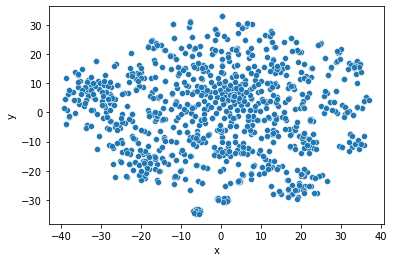

In [224]:
sns.scatterplot(x="x",y="y",data = df_tsne)
plt.show()

In [225]:
# Silhouette score
from sklearn.metrics import silhouette_score
k_range=range(2,30)
best_n=-1
best_silhouette_score = -1
silhouette_score_arr = []
for k in k_range:
    kmeans=KMeans(n_clusters=k, random_state=200)
    kmeans.fit(X_df)
    clusters=kmeans.predict(X_df)
    score=silhouette_score(X_df,clusters)
    print('k:',k,'score: ',score)
    silhouette_score_arr.append(score)

    if score> best_silhouette_score:
        best_n=k
        best_silhouette_score=score
        
print('best_n:',best_n,'best score:',best_silhouette_score)
silhouette_score_arr=np.array(silhouette_score_arr)

k: 2 score:  0.029534304660903826
k: 3 score:  0.03839942643889479
k: 4 score:  0.042375915540987276
k: 5 score:  0.04883612921922594
k: 6 score:  0.05307489672659943
k: 7 score:  0.05308686331365126
k: 8 score:  0.056716529976763255
k: 9 score:  0.061502367754378826
k: 10 score:  0.0634768875955456
k: 11 score:  0.0683070732144305
k: 12 score:  0.06765271371933824
k: 13 score:  0.07658527094135034
k: 14 score:  0.06159143854588824
k: 15 score:  0.07173833744671784
k: 16 score:  0.08412011982345627
k: 17 score:  0.0751065586247737
k: 18 score:  0.08635426738245461
k: 19 score:  0.08245541114630074
k: 20 score:  0.085090996291445
k: 21 score:  0.08001916019486266
k: 22 score:  0.09480977384492681
k: 23 score:  0.08236477528830179
k: 24 score:  0.08984518112293101
k: 25 score:  0.08945662345856373
k: 26 score:  0.08687354921242432
k: 27 score:  0.09290822200233924
k: 28 score:  0.09853119094094641
k: 29 score:  0.08932968124191247
best_n: 28 best score: 0.09853119094094641


best silhoutte_score :  0.09853119094094641


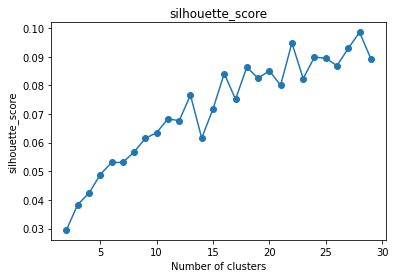

In [226]:
print('best silhoutte_score : ',best_silhouette_score)
plt.plot(k_range,silhouette_score_arr, 'o-')
plt.title('silhouette_score')
plt.xlabel('Number of clusters')
plt.ylabel('silhouette_score')
plt.show() # 26에서 최대 

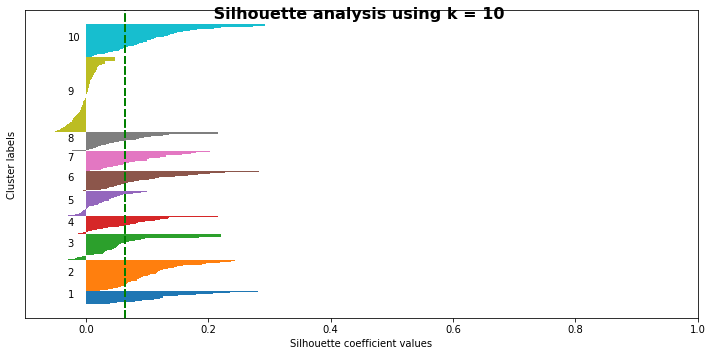

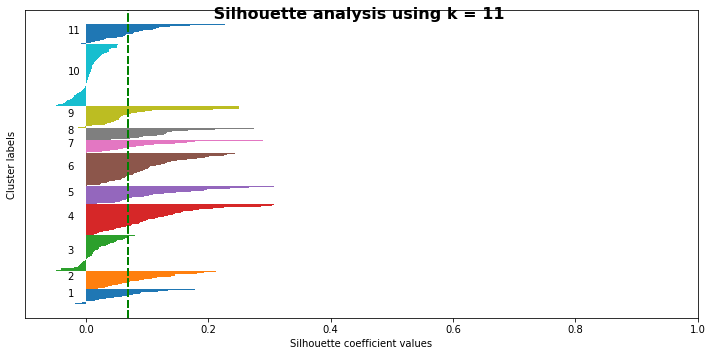

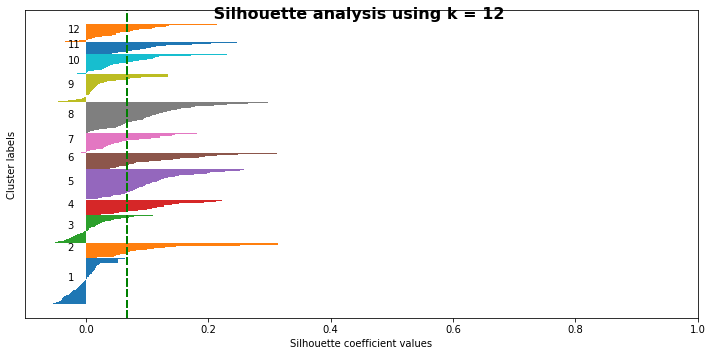

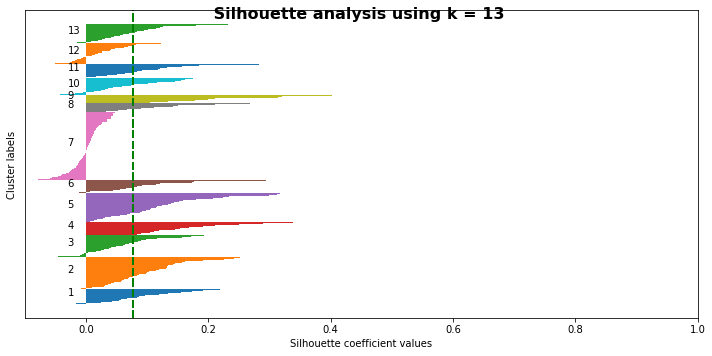

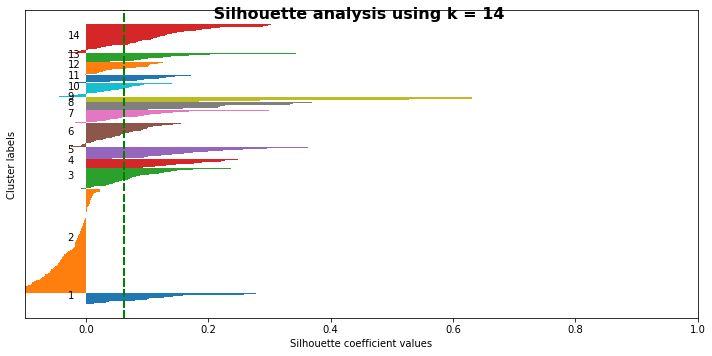

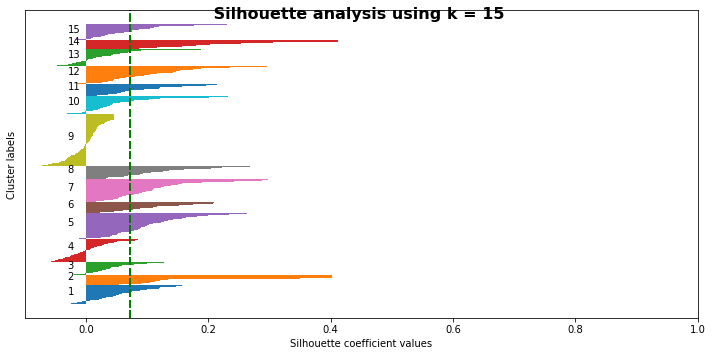

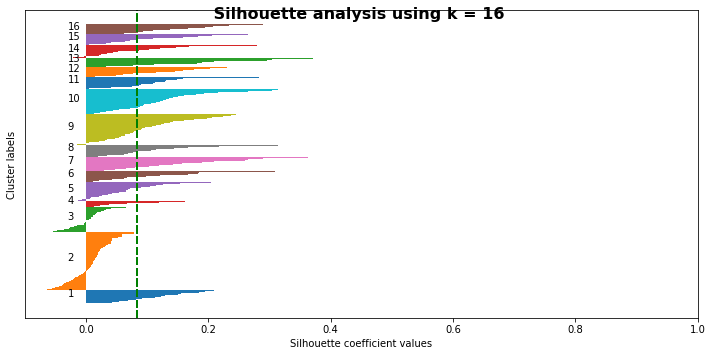

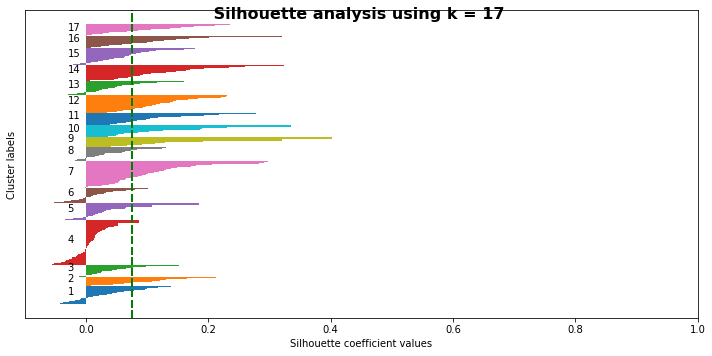

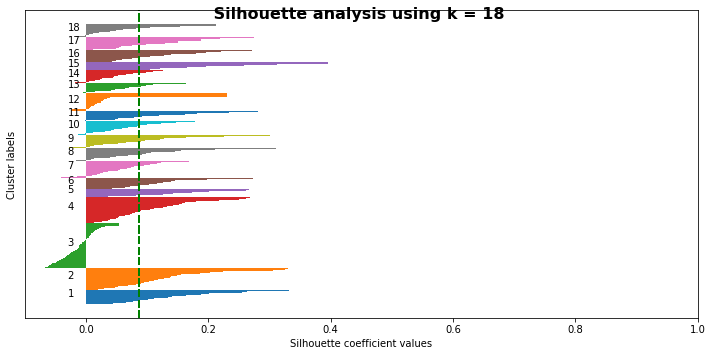

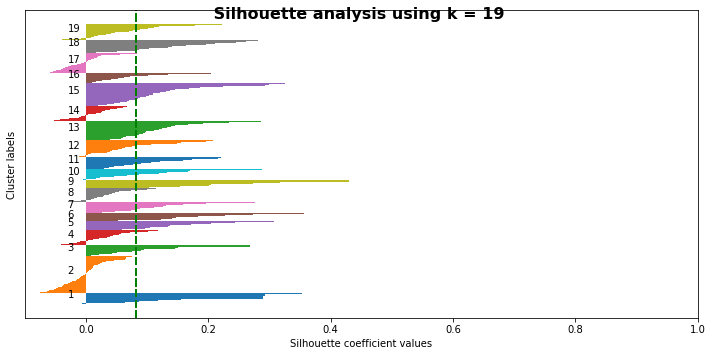

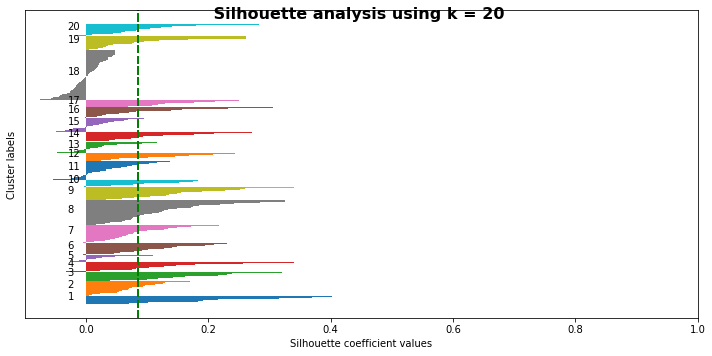

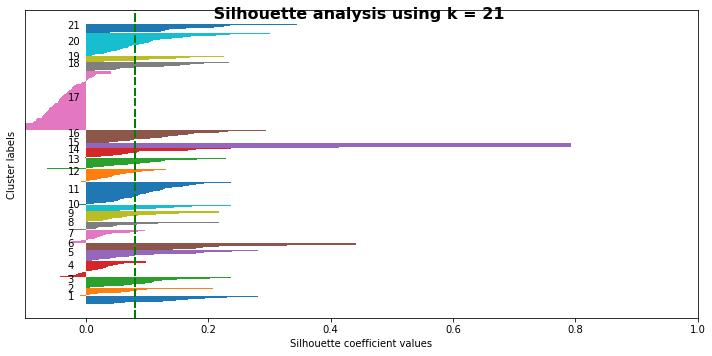

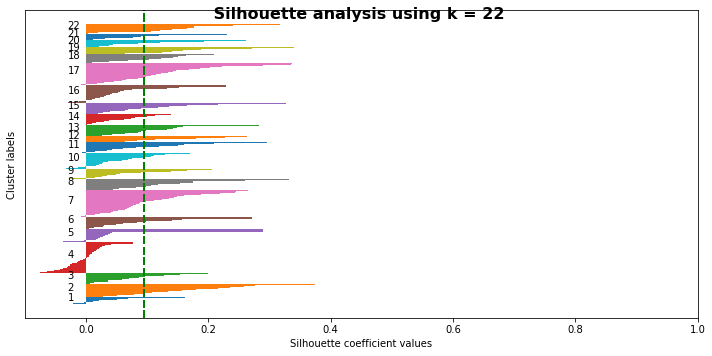

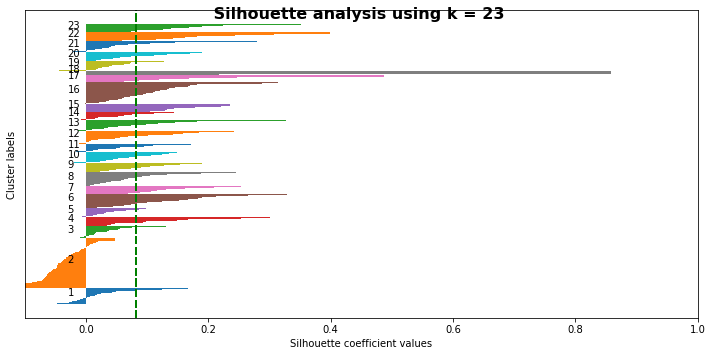

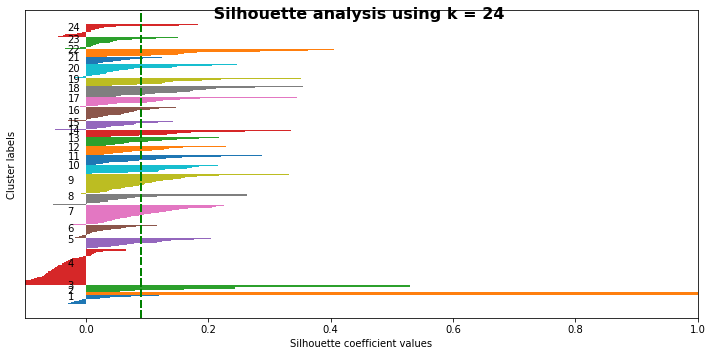

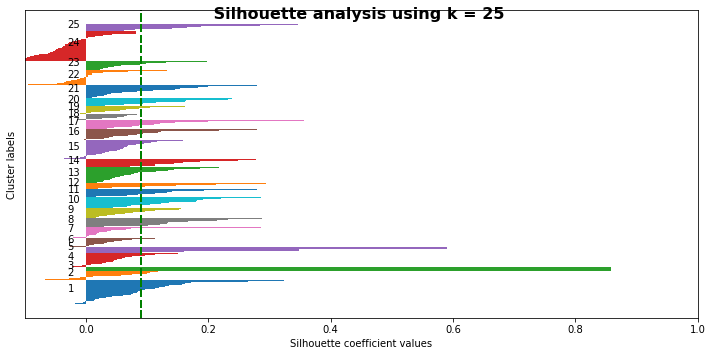

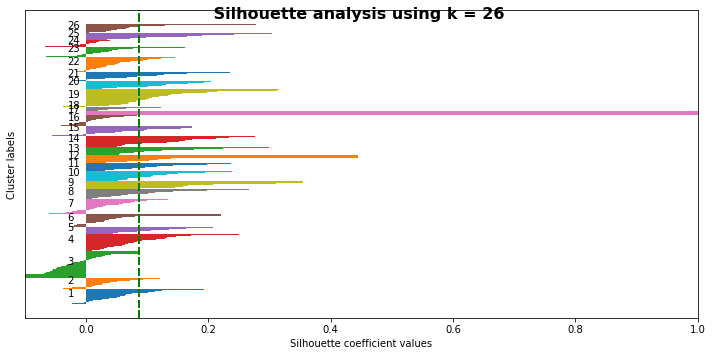

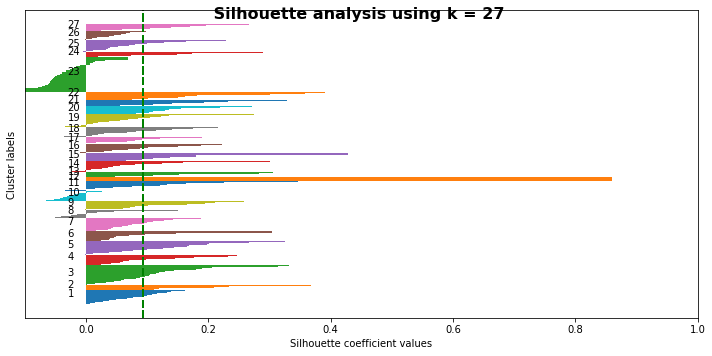

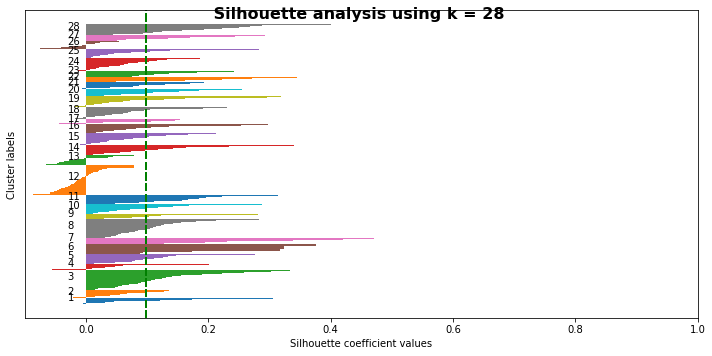

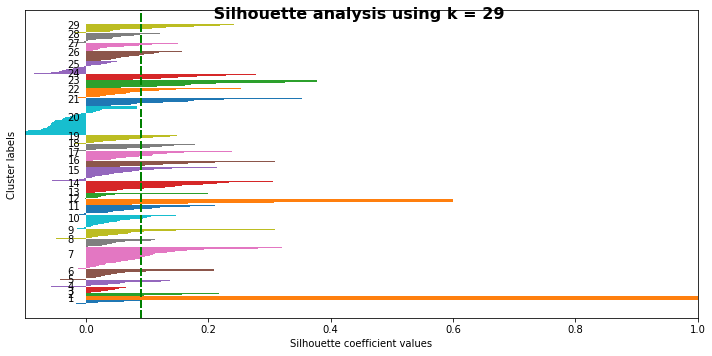

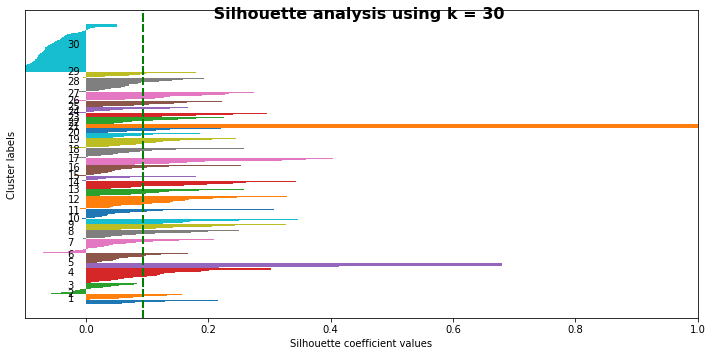

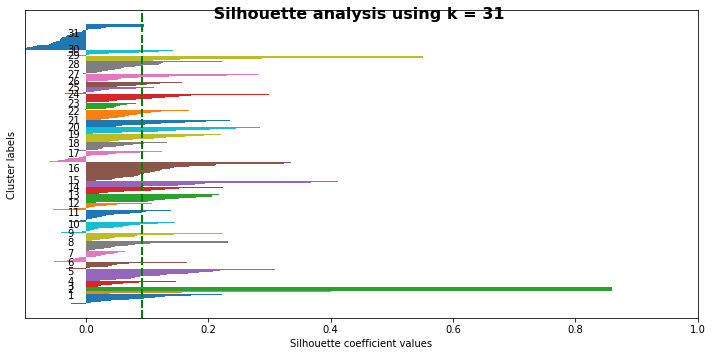

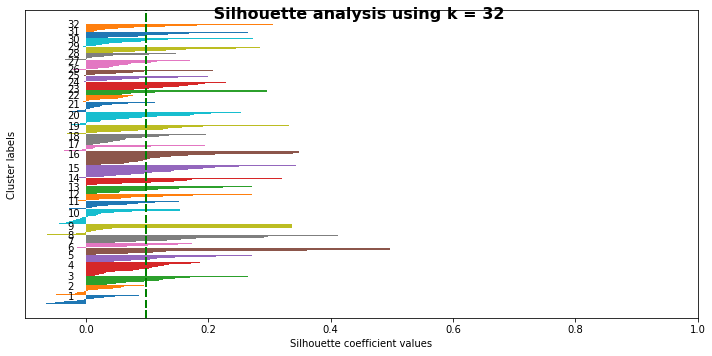

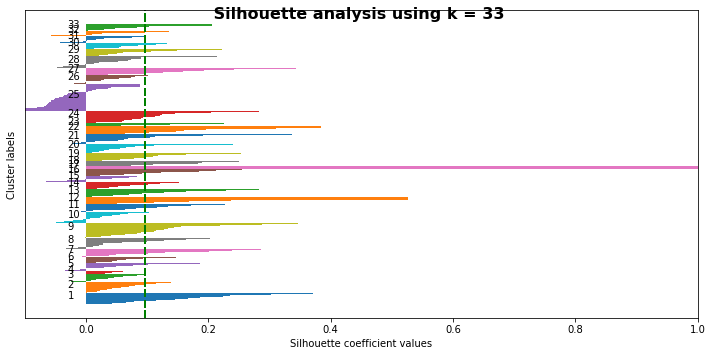

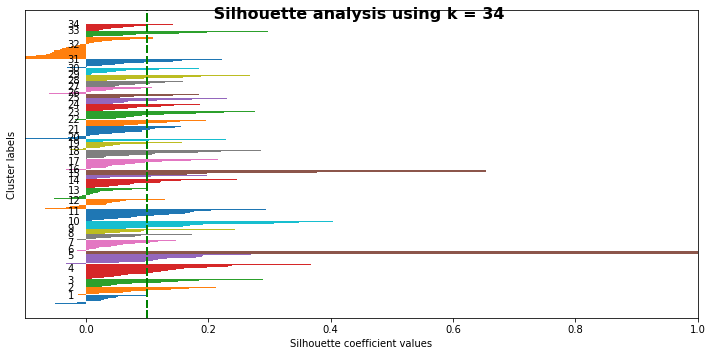

In [227]:
# import neccessaries librariesimport pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples,silhouette_score

# load into Dataframe 

for i,k in enumerate(range(10,35)):
    
    fig, ax = plt.subplots(1,1,figsize=(10,5))
    
    # Run the kmeans algorithm
    kmeans=KMeans(n_clusters=k, random_state=200)
    kmeans.fit(X_df)
    clusters=kmeans.predict(X_df)
    score=silhouette_score(X_df,clusters)
    # get silhouette
    silhouette_vals = silhouette_samples(X_df,clusters)
        #silhouette_vals
    # silhouette plot
    y_ticks = []
    y_lower = y_upper = 0
    for i,cluster in enumerate(np.unique(clusters)):


        cluster_silhouette_vals = silhouette_vals[clusters ==cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)

        ax.barh(range(y_lower,y_upper),
        cluster_silhouette_vals,height =1);
        ax.text(-0.03,(y_lower+y_upper)/2,str(i+1))
        y_lower += len(cluster_silhouette_vals)

        # Get the average silhouette score 
        avg_score = np.mean(silhouette_vals)
        ax.axvline(avg_score,linestyle ='--',
        linewidth =2,color = 'green')
        ax.set_yticks([])
        ax.set_xlim([-0.1, 1])
        ax.set_xlabel('Silhouette coefficient values')
        ax.set_ylabel('Cluster labels')
#         ax.set_title('Silhouette plot for the various clusters');

    
    # scatter plot of data colored with labels
    

    plt.tight_layout()
    plt.suptitle(f' Silhouette analysis using k = {k}',fontsize=16,fontweight = 'semibold')
#     plt.savefig(f'Silhouette_analysis_{k}.jpg')

In [228]:
best_silhouette_score

0.09853119094094641

In [229]:
# ks = range(1,30)

# inertias = []

# for k in ks:
#     model = KMeans(n_clusters=k)
# #     model.fit(X.toarray()) # 축소 안한 inertia
#     model.fit(tsne_features) # tsne한 놈
#     inertias.append(model.inertia_)
# # Plot ks vs inertias
# plt.plot(ks, inertias, '-o')
# plt.xlabel('number of clusters, k')
# plt.ylabel('inertia')
# plt.xticks(ks)
# plt.show()


In [230]:
# import numpy as np
# X = np.array(tsne_features)
# X_centered = X - X.mean(axis=0)
# U,s,Vt = np.linalg.svd(X_centered)
# c1 = Vt.T[:,0]
# c2 = Vt.T[:,1]

# print('X_centered:', X_centered)
# print('V:', Vt.T)
# print('c1:',c1)
# print('c2:',c2)

In [231]:
# X.mean(axis=0)

In [232]:
# W2 = Vt.T[:,:2]
# W2

In [233]:
# X2d = X_centered.dot(W2)
# X2d

In [234]:
# from sklearn.decomposition import PCA
# pca = PCA()
# pca.explained_variance_ratio_

In [235]:
# from sklearn.decomposition import KernelPCA
# # kpca = KernelPCA(n_components = 2, kernel = "rbf", gamma = 15)
# kpca = KernelPCA(n_components = 2, kernel = "rbf")
# features_kpca = kpca.fit_transform(tsne_features)

In [245]:
n_clusters = 22
kmeans = KMeans(n_clusters=n_clusters)
# kmeans = KMeans(n_clusters=4,verbose = 1)
kmeans

# 모델에 fitting 하기
# kmeans.fit(tsne_features) # 축소된놈 Fitting
kmeans.fit(X.toarray()) # 축소 안한놈 Fitting
# kmeans.fit(features_kpca)

# y_kmeans = kmeans.predict(tsne_features)
y_kmeans = kmeans.predict(X.toarray())
# y_kmeans = kmeans.predict(features_kpca)

y_kmeans[0:10] # 군집화 된 결과


array([20, 21,  0,  9,  8, 19,  5, 21,  1, 17], dtype=int32)

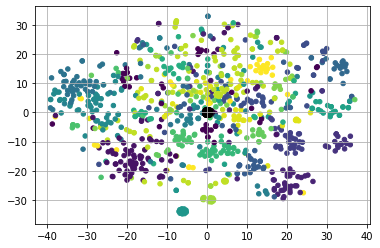

In [246]:
plt.scatter(np.array(tsne_features)[:,0], np.array(tsne_features)[:,1], c=y_kmeans, s=20, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='black', s=100, alpha=0.5)
plt.grid()
plt.show()

In [247]:
clustered_dic = {}
clustered_list = []
cluster_num = len(set(y_kmeans))
for idx,i in enumerate(y_kmeans):
    if i not in clustered_dic:
        clustered_dic[i] = [df_화재['연번'].iloc[idx]]
    else:
        clustered_dic[i].append(df_화재['연번'].iloc[idx])
clustered_dic
# 클러스터링이 된 패키지들
# 20개의 군집으로 생성

clustered_dic = sorted(clustered_dic.items(), key=lambda x: x[0])
df_cluster = pd.DataFrame(clustered_dic,columns=['num','clusters'])
cluster_num = [len(i) for i in df_cluster['clusters']]
df_cluster['cluster_num'] = cluster_num

df_cluster


,num,clusters,cluster_num
0,0,"[672, 20962, 25773, 29210, 42577, 46481, 48308...",47
1,1,"[4276, 13224, 16312, 21544, 34484, 41333, 4142...",83
2,2,"[20055, 41679, 49242, 49268, 63762, 64141, 834...",46
3,3,"[29671, 29763, 29764, 29776, 29778, 29782, 298...",27
4,4,"[8328, 8391, 8527, 11593, 11605, 16036, 19923,...",36
5,5,"[3112, 9912, 11409, 13071, 40730, 53811, 53831...",43
6,6,"[9084, 41787, 54884, 69636, 84766, 85232, 9171...",46
7,7,"[26226, 58215, 58218, 88318, 146537, 146538, 1...",24
8,8,"[1388, 7567, 11171, 11401, 12572, 14714, 18289...",53
9,9,"[963, 19655, 34939, 34945, 35041, 37541, 56560...",35


In [248]:
label = df_cluster.iloc[0].clusters
for key in df_cluster.iloc[0].clusters:
    print(df_화재[df_화재["연번"] == key]["재해개요"])

6    [비보고 사유] 개인 휴가중에 발생한 개인적 업무를 보다 발생한 사고라서 생각하여 ...
Name: 재해개요, dtype: object
89    2012.02.26(일) 17:37경 경기 김포시 양촌읍 구내리 108-1 소재 (...
Name: 재해개요, dtype: object
106    부산 영도구 대평동 소재 SK산업 공장에서 GAS 전용선 안전밸브를 분해하는 과정에...
Name: 재해개요, dtype: object
124    현장10호 기기에서 금형핫런너 게이트부위 플라스틱 수지를 녹이기 위해 부탄가스를 사...
Name: 재해개요, dtype: object
193    2012.05.29 07시30분경 현장에 들어와 지기 담당기계(미선)에 까스 점화를...
Name: 재해개요, dtype: object
204    본인은 동신직물 제직기사로 근무하던중 2012년6월14일 02시경 야간근무중 원단 ...
Name: 재해개요, dtype: object
224    2012년 06월 21일 09시경 화순군 동면 대포리 1062-3소재 S.H금속 내...
Name: 재해개요, dtype: object
239    파이프 절단 작업중 LPG호스에서 가스가 누출되어 불이 붙으면서 바지에 불이 붙어 ...
Name: 재해개요, dtype: object
277    재해자는 2012.7.24 13시 30분경 사업장 공장내에서 선박부품인 T-BHD ...
Name: 재해개요, dtype: object
278    2012년 7월24일 08시30분경 폐자동차 해체시 에어콘 파이프 절단과정에서 가스...
Name: 재해개요, dtype: object
289    경기도 시흥시 정왕동 1236-5번지소재 신원화학(주)의 생산현장에서 산소용접기로 ...
Name: 재해개요, dtype: object
377    2012년 10월 26일 10시 50분경 25BL' A 조립장에서 가조립된 북항대교...
Name: 재해개요, dtype: object
397    

In [249]:
y_kmeans = kmeans.predict(X.toarray())

In [250]:
X_df['cluster'] = y_kmeans

In [251]:
X_df

,가스,건조,경남,공정,그라인더,근무,기계,기름,난로,누출,...,허벅지,현장,호기,호스,화기,화상,회사,후송,흡입,cluster
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.446712,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.180605,0.00000,0.0,0.0,20
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.236512,0.0,0.0,0.0,...,0.0,0.212077,0.0,0.000000,0.000000,0.095621,0.24714,0.0,0.0,21
2,0.427467,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.451407,0.000000,0.109400,0.00000,0.0,0.0,0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.301934,0.0,0.000000,0.000000,0.136136,0.00000,0.0,0.0,9
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.166062,0.00000,0.0,0.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.208103,0.000000,0.000000,0.00000,0.0,0.0,2
936,0.000000,0.0,0.0,0.0,0.0,0.0,0.500813,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.202477,0.00000,0.0,0.0,20
937,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.378875,0.000000,0.155467,0.00000,0.0,0.0,15
938,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.141004,0.00000,0.0,0.0,8


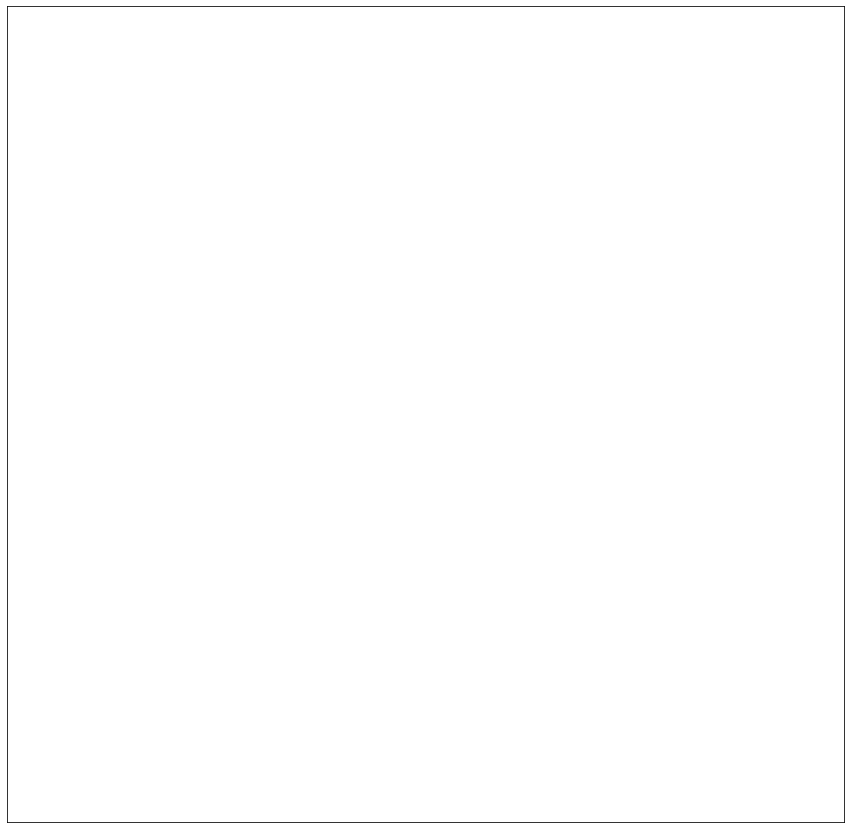

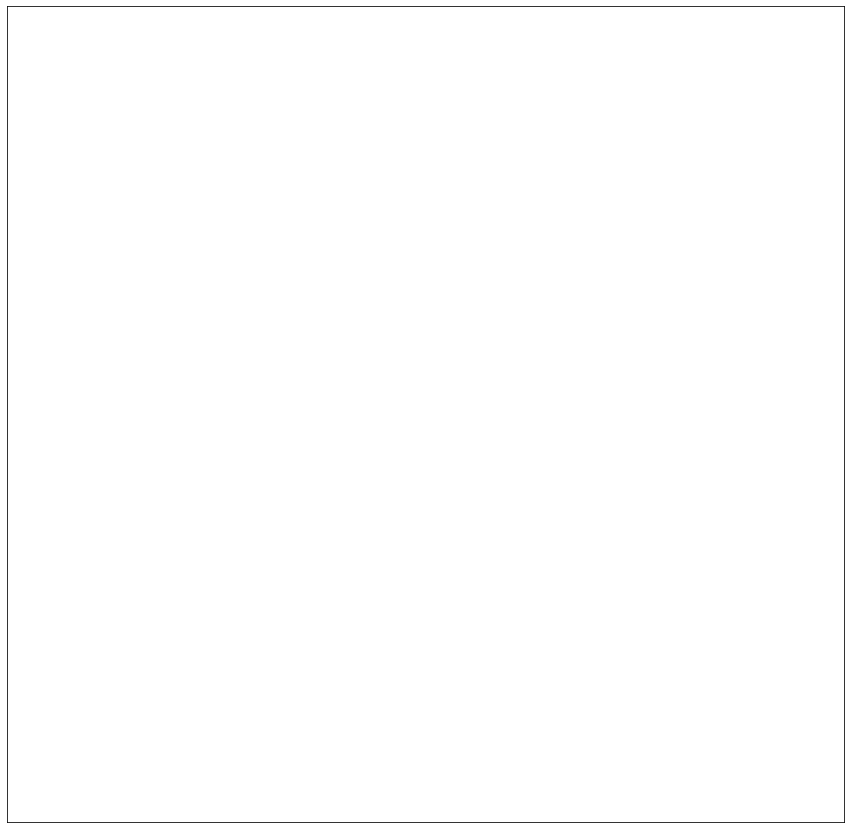

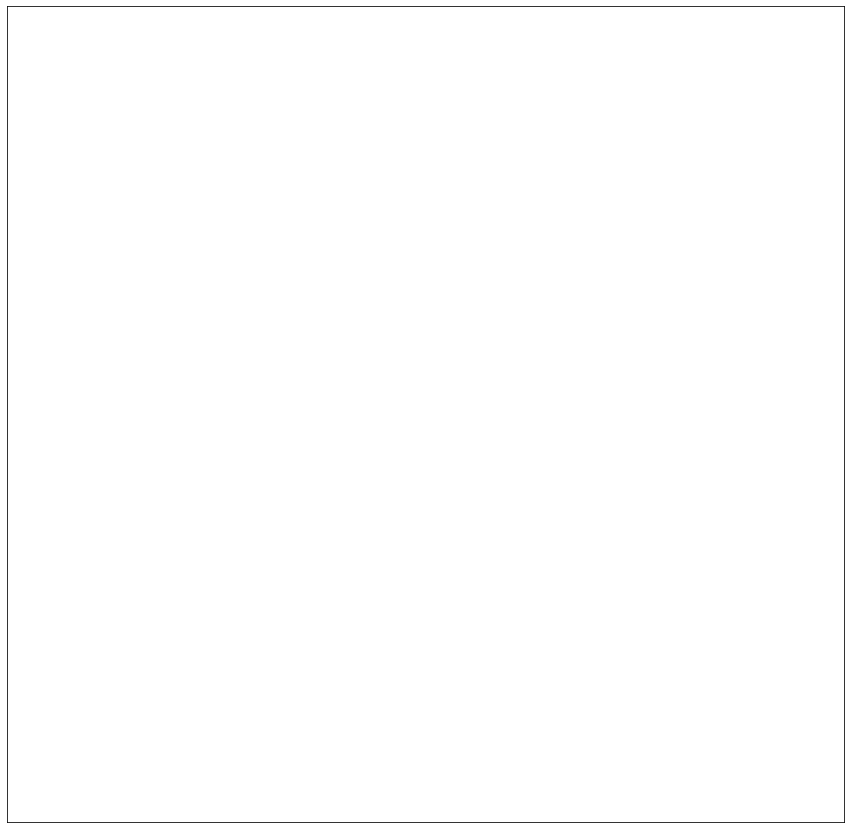

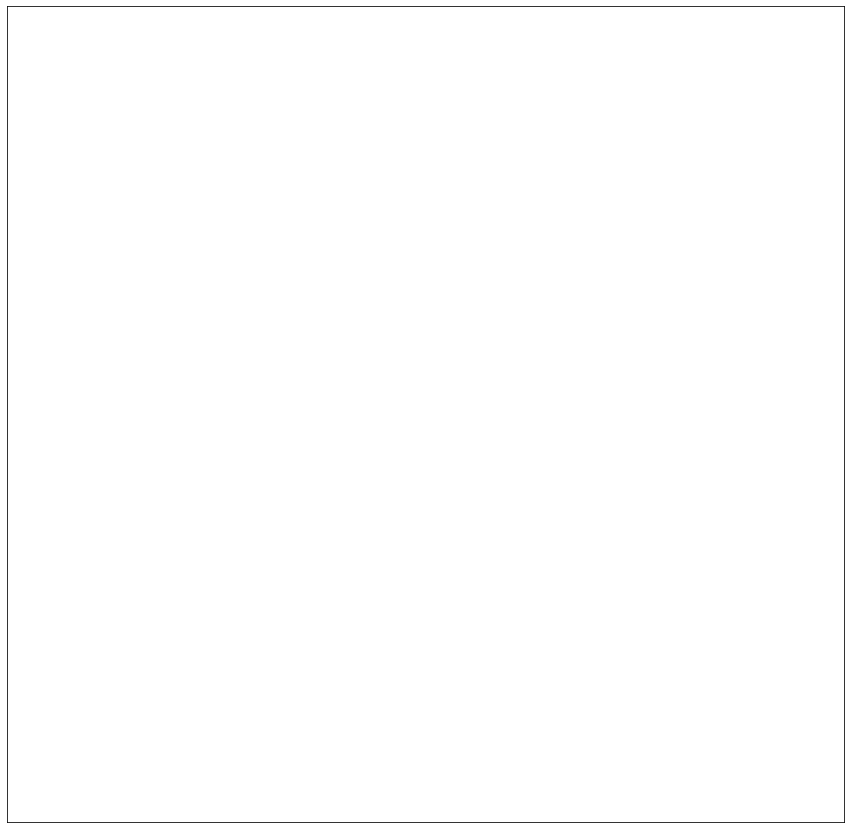

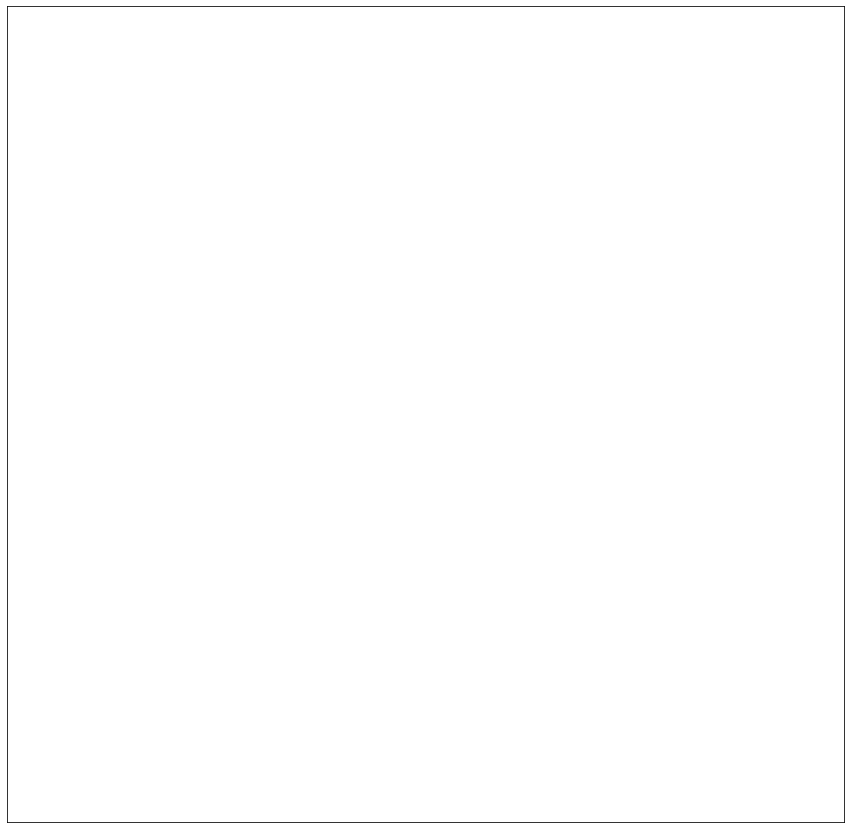

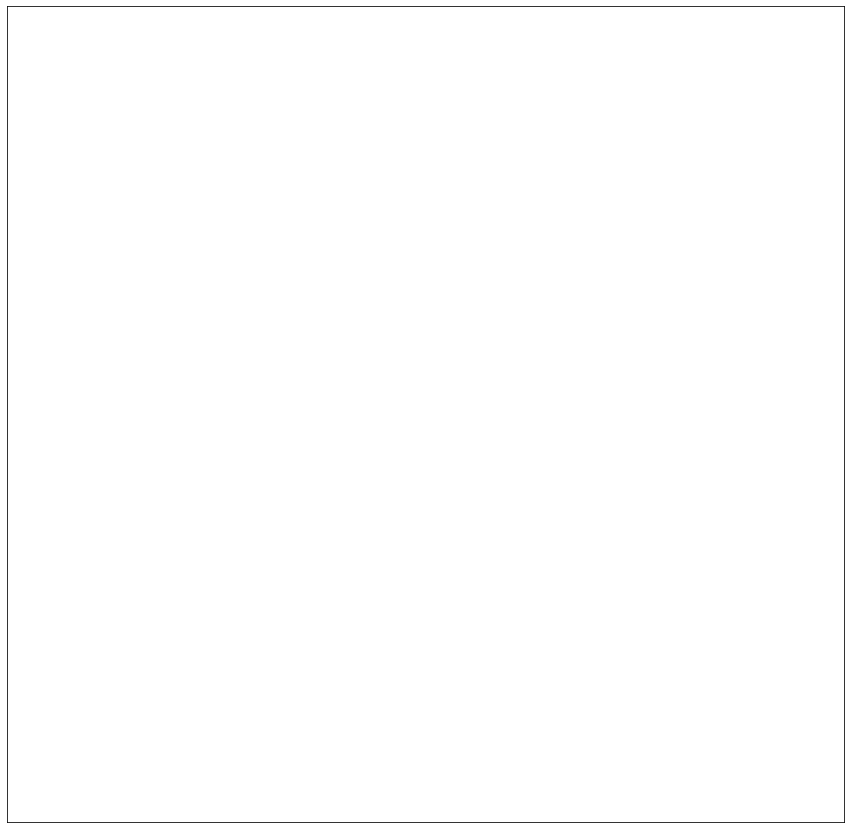

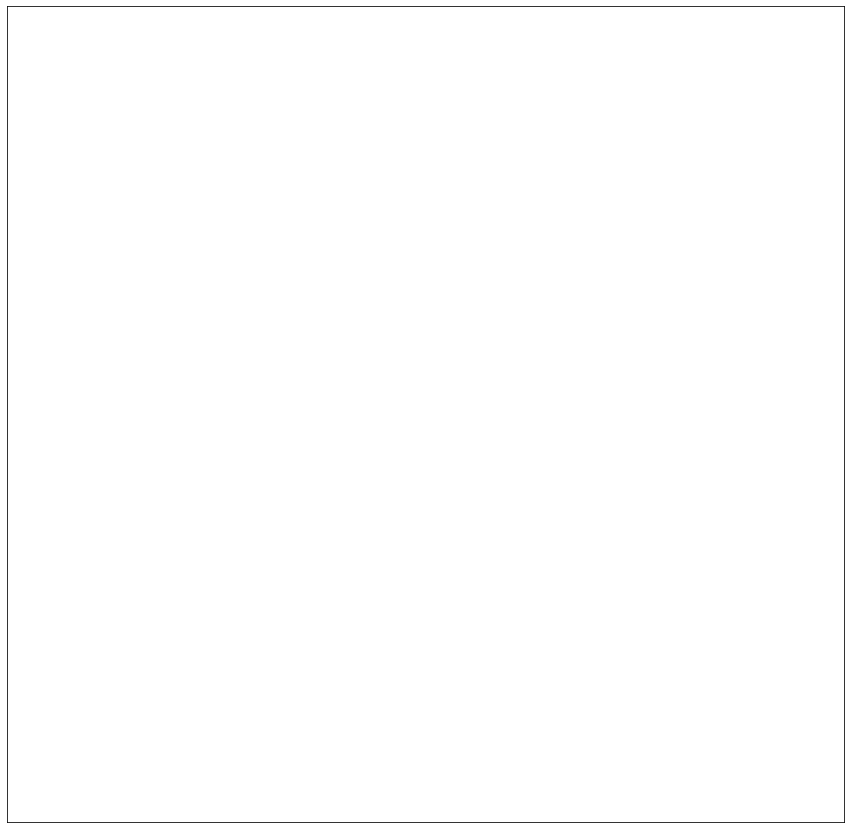

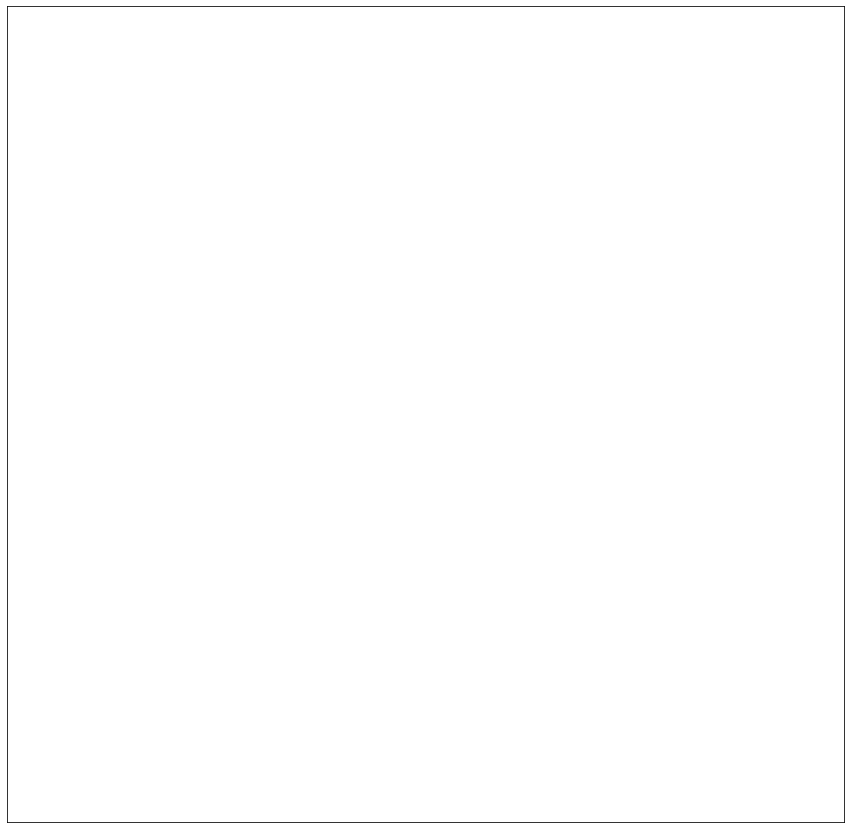

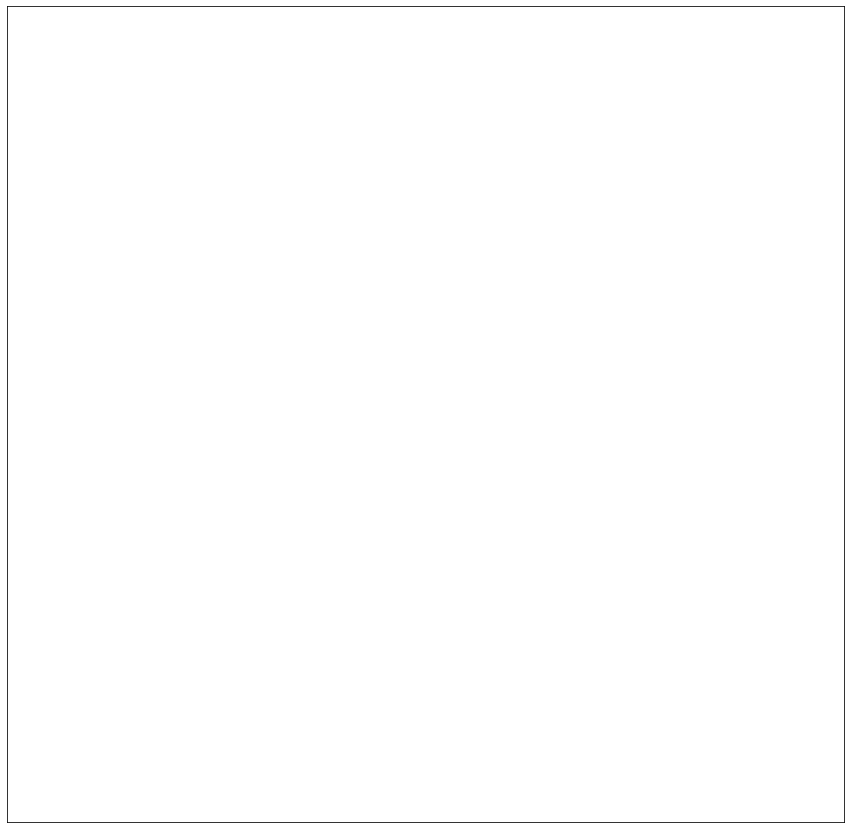

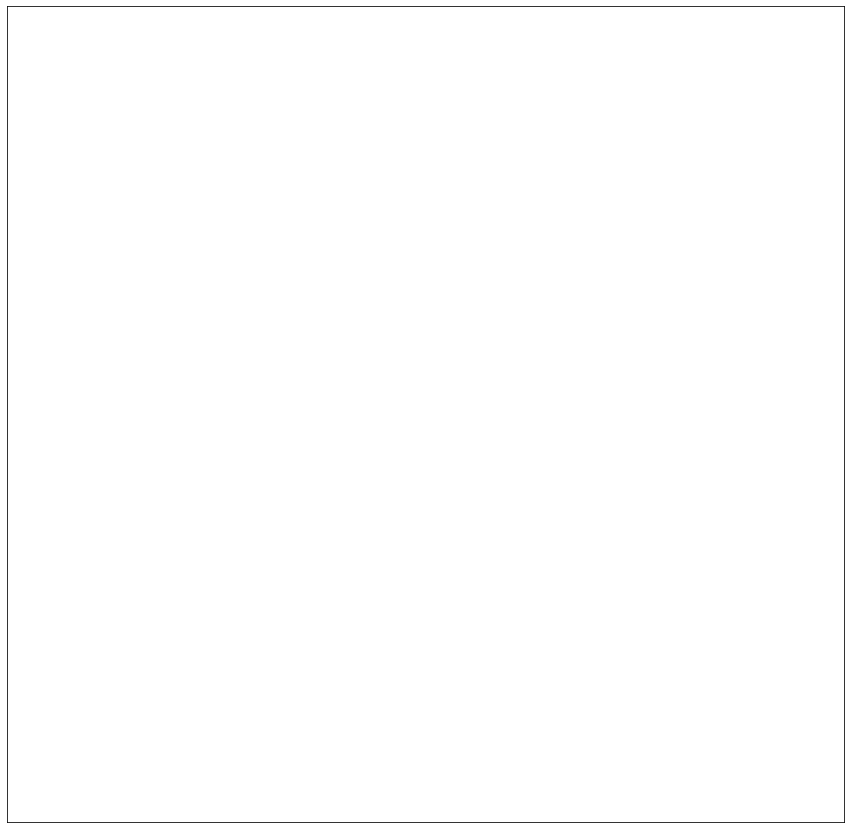

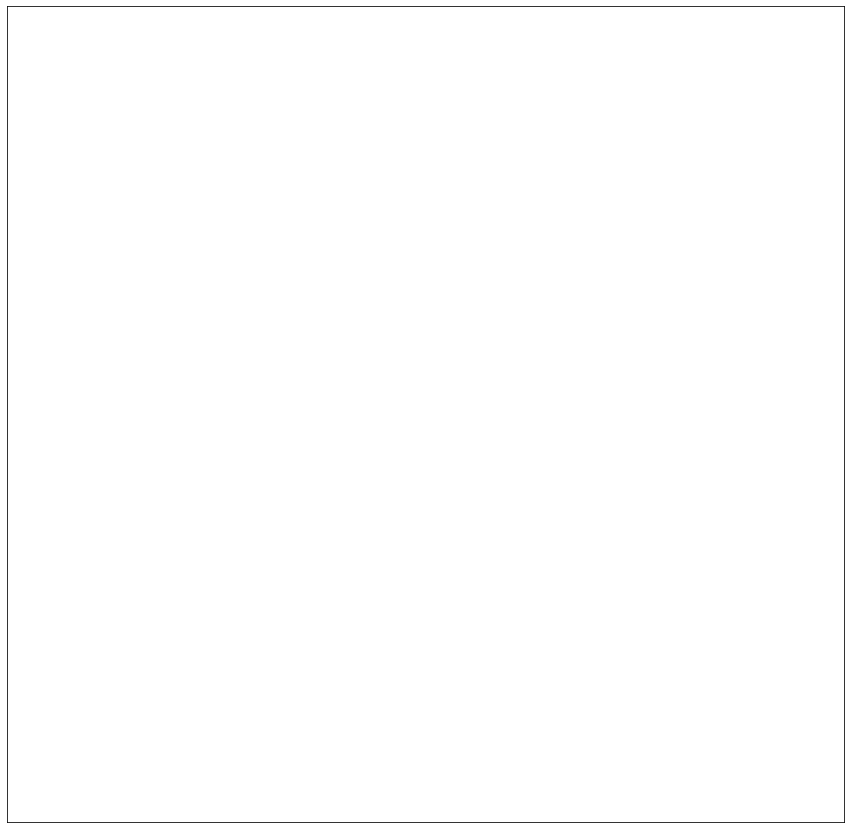

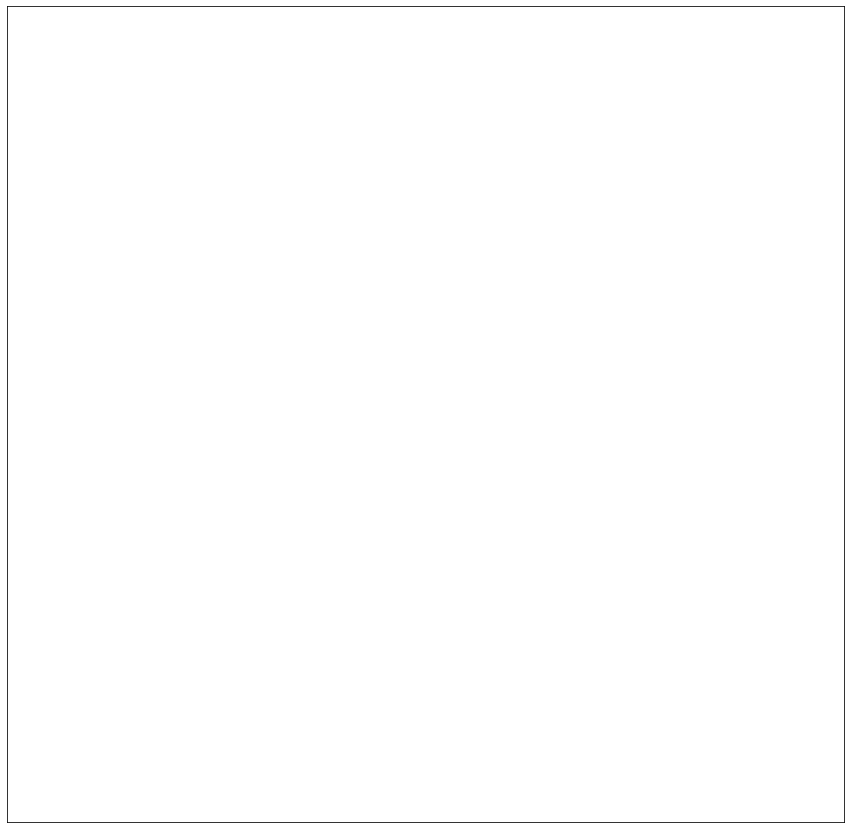

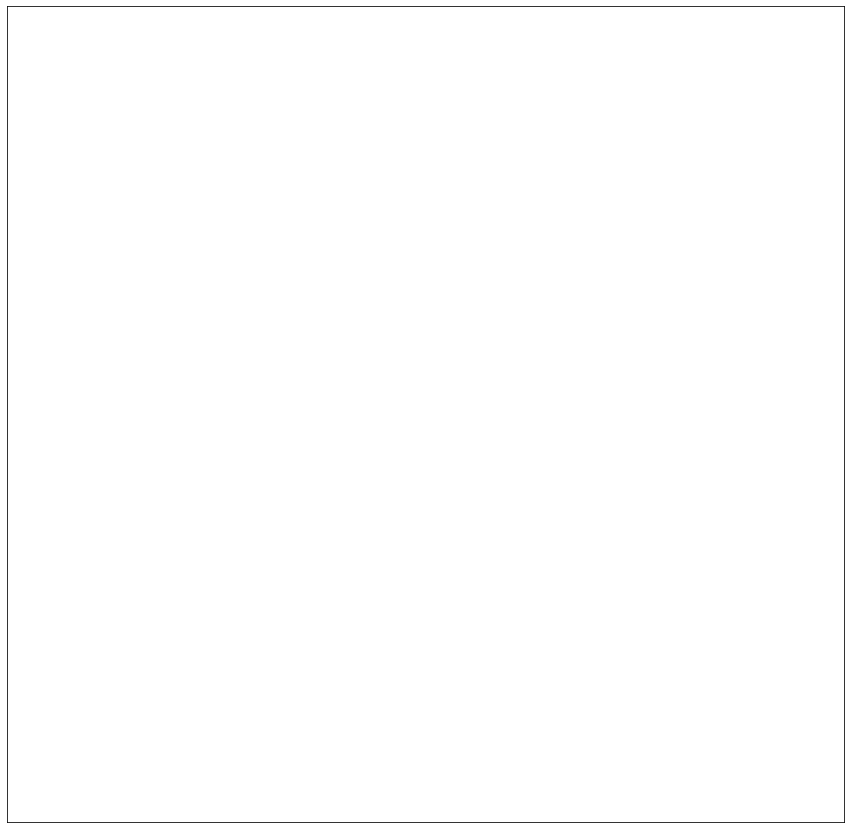

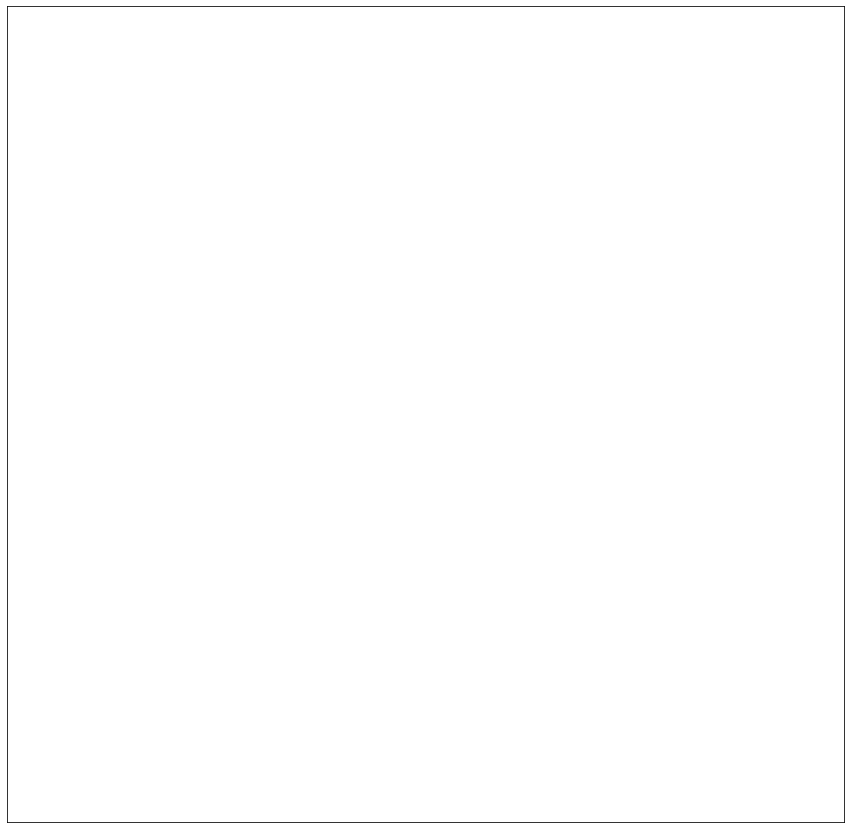

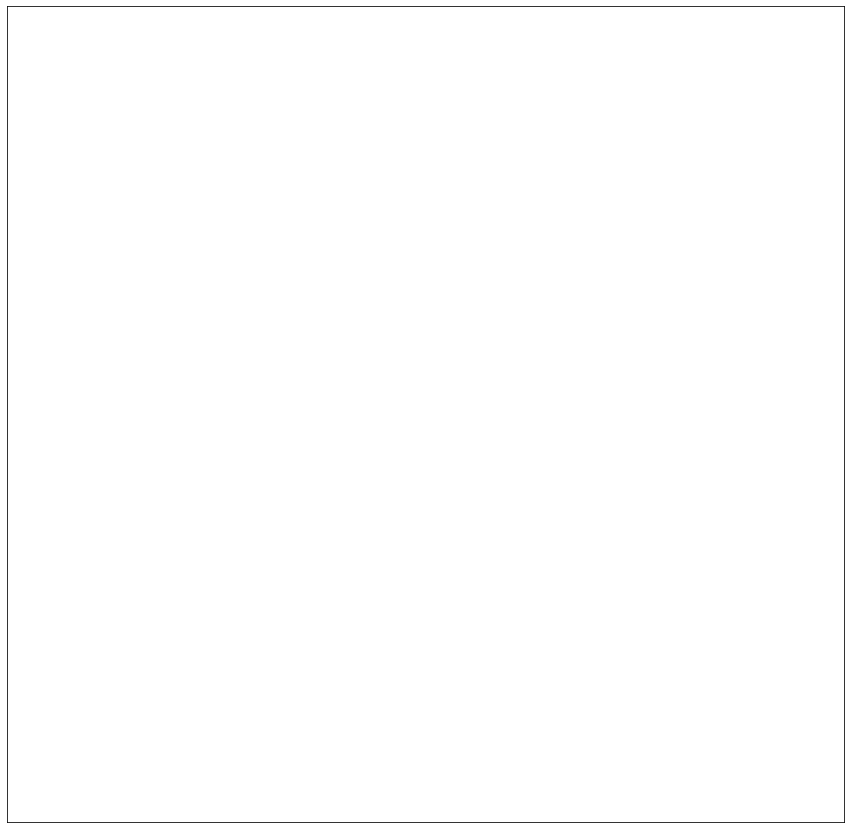

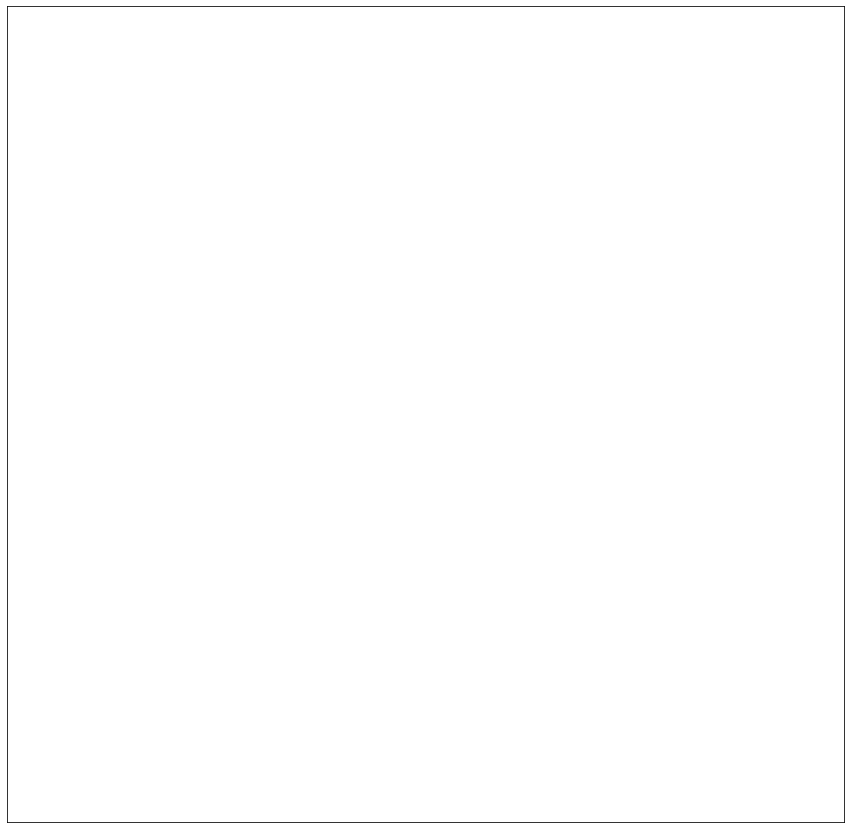

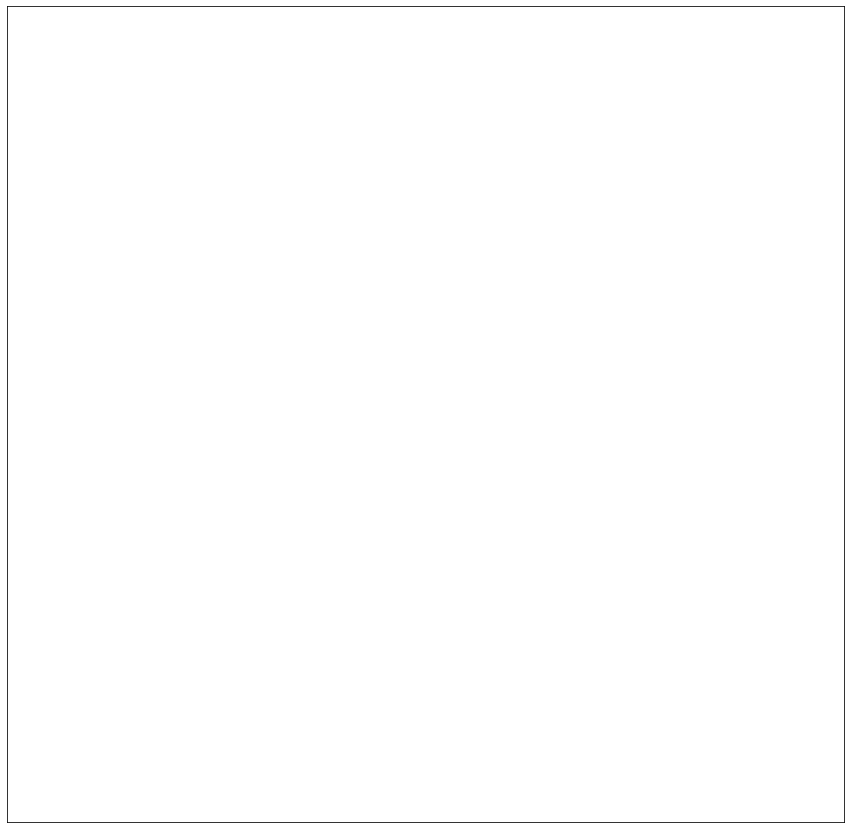

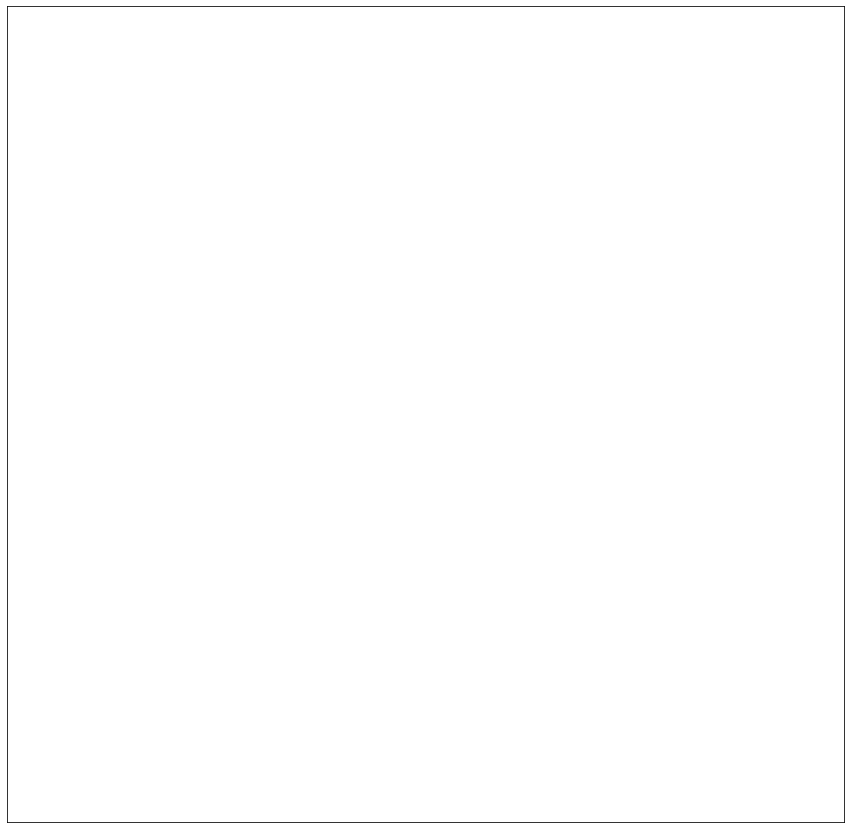

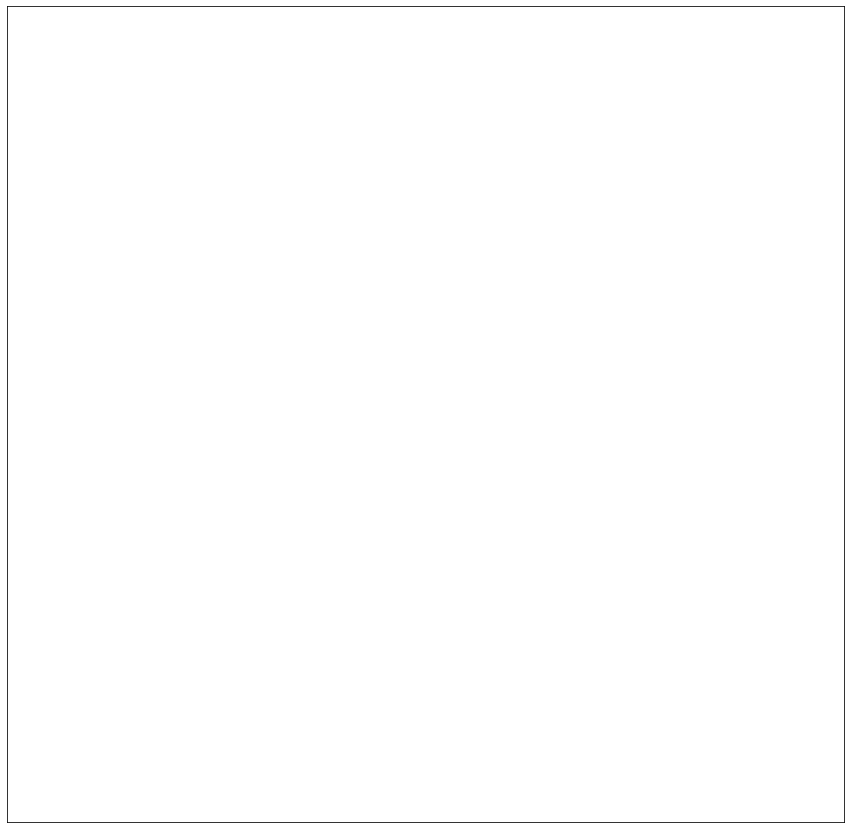

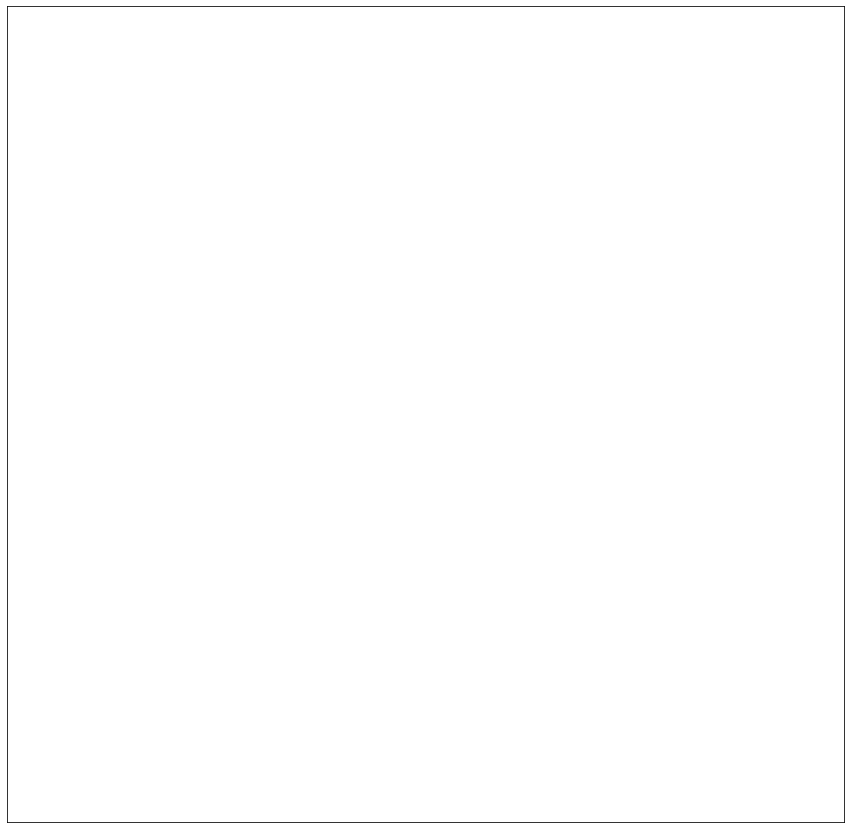

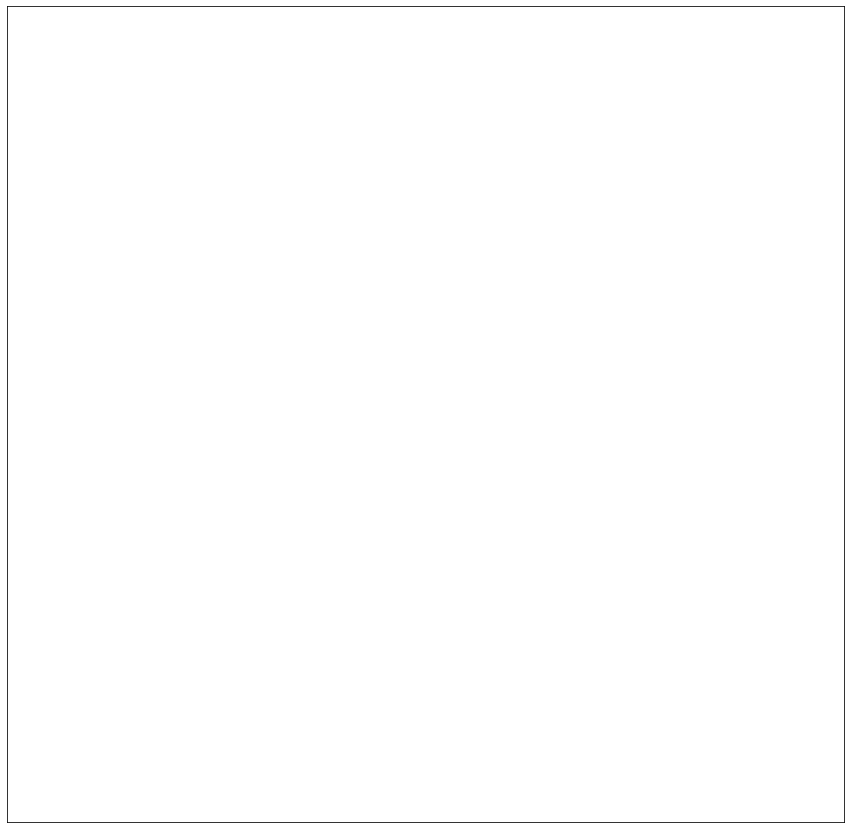

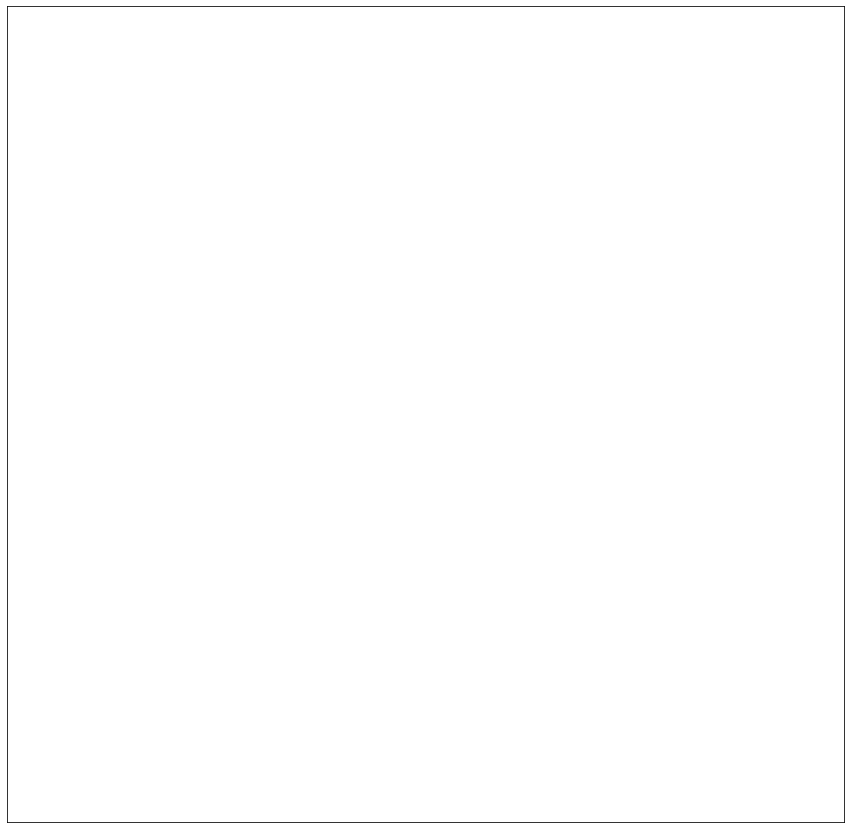

In [252]:
from collections import defaultdict
from networkx.algorithms.community import girvan_newman

for ci in range(0,n_clusters): # ci : cluster_index
    semi_cluster= X_df[X_df['cluster']==ci] #cluster 별로 워드 임베딩 결과 필터링
    semi_cluster['count'] = 1 # 단어 별 빈도 수 컬럼을 추가하기 위해 count column 초기화 

    for i in semi_cluster.index:
        semi_cluster.loc[i,'count'] = nouns_counter[i] #미리 분석한 빈도 수 결과를 데이터 프레임에 입력
        
    
    cluster_up100 = semi_cluster.sort_values(by='count',ascending=False)[:100] # 빈도 수 별로 정렬 후 상위 100개 키워드 추출
#     cluster_up100.to_csv(sort_name+'_re_cluster'+str(ci)+'_re_DTM.csv',encoding='utf-8-sig') 
    cluster_up100.drop(['cluster','count'],axis=1,inplace=True) # 네트워크 분석시 불필요한 컬럼 제거 


    
    idx =cluster_up100.index
    new_index = []
    for i in idx:  #동시단어 행렬을 만들기 위한 반복문
        if i in count_term_document_matrix.index:
            new_index.append(i)
            
    up_100_df = count_term_document_matrix.loc[new_index,new_index]
#     up_100_df.to_csv('동시단어출현_'+sort_name+'_re_cluster'+str(ci)+'.csv',encoding='utf-8-sig') 

    
    #네트워크 시각화를 위한 input 데이터를 만드는과정 
    dic = {}
    dic['word'] = []
    dic['toword'] = []
    dic['count'] = [] 

    count = defaultdict(int)

    idx = 1
    for col in up_100_df.columns:

        for col2 in up_100_df.columns[idx:]:
#             score=semi_cluster.loc[col,col2]
#             if score<=0.80:
#                 continue
            dic['count'].append(score)

            dic['word'].append(col)
            dic['toword'].append(col2)

            count[col]+=1
            count[col2]+=1
        idx+=1

    daf = pd.DataFrame(dic) # dic to dataframe
    g = nx.from_pandas_edgelist(daf,'word','toword',)
    
    plt.figure(figsize=(15, 15))
    pos = nx.spring_layout(g,weight='count',k=1*1/np.sqrt(len(g.nodes())), iterations=50)

    pos=nx.kamada_kawai_layout(g,
    #                            dist=(2,3),
                               weight='count',
                               scale=10,
                               center=(0,5),
                               dim=2,)
    nx.draw_networkx(g, with_labels = True,
                     pos = pos,
                     node_color='pink',
                     node_size = 900,
                     font_color ='black',
                     font_weight ='bold',
                     font_size =10,
                     font_family = 'AppleGothic')
    # (g,pos,node_size=[800], node_color='pink', font_size=12,font_family='AppleGothic',)

#     plt.savefig(sort_name+'_re_cluster'+str(ci)+'.png')

# plt.show()



In [253]:

# total_nouns = set(morphs_list)
# tndic = {}
# for sentence in sentence_nouns_list:
#     for s in sentence:
#         try:
#             tndic[s] +=1
#         except:
#             tndic[s] = 0
#             tndic[s] +=1 
# # sentence_nouns_list)

In [255]:
total_cluster = []
for ci in range(0,n_clusters):
    semi_cluster= X_df[X_df['cluster']==ci]

    cluster_sentence_list = []
    for key in semi_cluster.index:
        cluster_sentence_list.append(df_화재.iloc[key]["재해개요"])
    total_cluster.append(cluster_sentence_list)

In [300]:
# 명사부분 추출
sentence_list = []
morphs_list = []
all_cluster_sentence = []
tagger = Mecab()
sentence_nouns_list = []
for clus in total_cluster:
    cluster_sentence = []
    for post in clus:
        ne = ""
        for noun in tagger.nouns(post):
            if noun not in list(df_stopwords.get("불용어")):
                if len(noun) == 1:
                        noun = noun+'_'
                        ne = ne + ' ' +noun
                else:
                    ne = ne +' '+noun
        cluster_sentence.append(ne)

    all_cluster_sentence.append(cluster_sentence) # 한 클러스터의 전체 단어 





In [16]:
clus_sentence = [[' 보고 사유 개인 휴가 개인 생각 재처리 조사 견해 산재 처리 사유서 산업재 조사표 진단서 의거 고의 판단 이전 조치 기준 의거 요양 기준 미만 최근 이내 동일 사안 위반 내역 경고 처분 종결 장소 김천 구성면 소재 냇가 목적 고기 도구 가스 기기 내용 사유 가스 호스 연결 상태 호스 화상',
 ' 경기 김포시 양촌읍 내리 소재 실업 컨테이너 기숙사 스리랑카 국적 부부 나리 불명 전선 단락 가스 질식',
 ' 부산 영도구 대평동 소재 전용선 안전밸브 분해 분해 밸브 챔버 분해 망치 스파크 잔류 가스 화상',
 ' 현장 기기 금형 핫_ 게이트 부위 플라스틱 수지 부탄가스 토치 수지 가스 머리카락',
 ' 분경 현장 기계 미선 까스 까스 까스 메인 밸브 불응 십_ 초_ 유출 가스',
 ' 동신 직물 제직 기사 근무 야간 근무 원단 결점 제직 현장 쌤_ 채취 염료 주입 염색 회사 위치 구내식당 취사 가스 렌지 가스 누출 가스 하반신 화상',
 ' 화순군 동면 대포리 소재 금속 금형 예열 가스 밸브 통상 착오 가스 밸브 개방 가스 누출',
 ' 파이프 절단 호스 가스 누출 바지 화상',
 ' 분경 선박 부품 블록 박스 제작 용접 지급 에어 조끼 착용 조끼 공기 주입 공기 밸브 공기 주입 연결 기구 리플 임의 산소 밸브 연결 산소 가스 조끼 주입 접시 산화 불꽃 조끼 누출 산소 가스 조끼 폭발 상반신 중화상',
 ' 분경 자동차 체시 에어 파이프 절단 가스 가슴 화상 후송',
 ' 경기도 시흥시 정왕동 번지 소재 신원 화학 현장 산소 용접기 노_ 줄_ 연결 가스 줄_ 헤드 탈락 화기 오른팔 머리 화상',
 ' 분경 조립 조립 북항 대교 공사 교량 박스 교정 석식 교량 박스 환기구 교정 토치 교정 토치 밸브 가스 누출 교량 박스 석식 교정 토치 박스 화상',
 ' 목요일 현장 가스 장소 산소 가스통 교환 가스 호수 압력 화기 작업복 조치 의료 화상 전문 센터 구로 성심 후성 치료',
 ' 평동역 광주 여성 지원 센터 카페 가스 요리 가스 화상',
 ' 휴대 부탄가스 충전 불량 가스 잔량 상태 쓰레기장 폐기 쓰레기장 이동한 잔량 부탄 가스 제거 구멍 압축 평소 일정 압축 작동 평소 온도 기화 바닥 부탄가스 상태 인지 압축기 작동 압축기 스파크 바닥 부탄가스 압축기 앞_ 상기 피복 전신 화상',
 ' 현장 개스 누출 바닥 누출 가스 화상 담배 불꽃 정전기 스파크 추정',
 ' 넥_ 스필 라인 과장 근무 고인 업장 지역 초기 압_ 진입 장소 출입구 가스 일산 탄소 중독 해임',
 ' 텐_ 집진기 배출 일부 가스 잔량 증기 섬유 정전기 스파크 환부 일동 소재 서울 정형외과 초진',
 ' 경남 거제시 연초면 소재 건화 기업 의장 번_ 섹_ 휴게 절단기 누출 가스 용접 불똥 옷_ 화상',
 ' 상기 요양 신청인 경북 안동 소재 농협 사료 경북 지사 보일러실 자격증 보유자 기화 점검 보일러실 반장 기화 게이지 압력 온도 점검 압력 정상 종항 반장 액상 가스 점검 배출 밸브 개방 밸브 개방 배관 잔류 가스 일부 방출 인지 상황 정상 작동 유무 전기 장치 작동 스파크 잔류 가스 반응 안면 상반신 화상',
 ' 상기 요양 신청인 경북 안동 소재 농협 사료 경북 지사 보일러실 반장 자격증 보유자 기화 점검 보일러실 근무자 영승 기화 게이지 압력 온도 점검 압력 정상 액상 가스 점검 배출 밸브 개방 밸브 개방 배관 잔류 가스 일부 방출 인지 정상 작동 유무 전기 장치 작동 스파크 잔류 가스 반응 안면 상반신 화상',
 ' 가스 누출 화상 내원',
 ' 분경 회사 식당 점심 식사 준비 주방 가스 유출 화상',
 ' 망인 가스 토치 호기 알루미늄 주조기 다이 캐스팅 금형 예열 가열 주조기 유압 작동 호스 가열 호스 손상 기름 망인 토치 면부 전신 화상 작업반장 엄진섭 발견 신고 센트럴 후송',
 ' 분쇄 건물 초기 소화 현장 접근 유해 가스 흡입 동시 현장',
 ' 가스 밸브 가스 불길 화상',
 ' 분경 울산 남구 성암동 소재 포스코 플랜 공장안 성형 김주현 용접 예열 가스 밸브 부탁 가스관 밸브 라이터 불꽃 당시 가스관 밸브 가스 상황 가스 역화 팔목 심재성 화상',
 ' 철재 빨래 건조대 제작 파이프 절단 사람 업장 구내식당 앞_ 장소 빨래 건조대 부품 도색 걸_ 대인 치구 구내식당 대형 버너 가스 토출구 음식물 찌꺼기 가스통 연결 고무호스 연결 토치 고무호스 고무호스 채_ 고무호스 옷_ 화상 구조 의거 베스티 후송 치료 신체 표면 화상 다발 장기 부전 패혈증 전신 염증 증후군 사인',
 ' 마그네슘 주조 가스 토치 모터 브라 켓_ 예열 보관 마그네슘 산화물 화상',
 ' 일요일 설비 레벨 게이지 상승 배출 가스 배출 인체 정전기 화상',
 ' 시경 시작 벨_ 중간 벨_ 중간 벨_ 중간 밸브 중간 밸브 오른손 점화기 가스',
 ' 분경 비금속 형장 가스통 안정기 가스 누출 화상',
 ' 수요일 아침 분경 분말 대형 라인 예열기 이경기 사원 예열기 자동 장치 작동 임의 수동 가스 적체 가스 발화 겨_ 전신 화상',
 ' 대우 조선 해양 선_ 가스 흡입 외_ 정신 충격',
 ' 가스 토치 절단 가스 호스 노화 불꽃 호수 바지 순식간',
 ' 당사 장내 자동차 해체 가스 차량 제거 통이 부식 가스 누출 주변 순식간 발전 화상 상황',
 ' 회사 휴무일 주간 외출 출근 야간 경비 겸_ 숙소 생활 회사 복귀 이후 회사 컨테이너 숙소 야간 경비 겸_ 아침 설치 가스레인지 찌개 가스 소리 컨테이너 가스통 밸브 컨테이너 싱크대 바닥 구멍 인접 연결 호스 설치류 크기 구멍 가스 누출 줄_ 컨테이너 휴대 가스레인지 소리 부산 금정구 구서동 소재 외과 의원 후송 화상 치료 패혈증 장기 전증',
 ' 서울시 강서구 국회대로 소재 아트 용접 천막 바람 성화 기술 전소 휴게실 휴식 김강용 침투 가스 신변 위협 수건 머리 화상 주변 도움 앰뷸런스',
 ' 분경 부산시 사하구 다대동 소재 흥진 전처리 지게차 운전 후진 가스 배관 앞_ 대형물 입시 필요 지지대 지지대 배관 파손 가스 누출 가스 누출 처리 전신 화상',
 ' 토요일 지에스 라인 퀸_ 크린 마무리 흑채 준비 라인 충전기 조작 이승배 기감 정진수 사원 충전기 연결 가스 라인 밸브 가스 누출 발견 밸브 교체 퍼지 화원 화상',
 ' 분경 팩슨 아세틸렌 가스 정제기 폭발 덕_ 화상',
 ' 시경 현장 연기 스모크 하우스 호기 장치 고장 부품 수리 상황 재자 엄태준 훈연 참나무 수작업 훈연 참나무 하부 부탄가스 토치 부탄가스 토치 가스 부탄가스 체류 불꽃 피재 화상',
 ' 분경 에어 졸_ 부문 충전 현장 편_ 설치 충전 라인 전기 판넬 제어 입실 가스 냄새 환기 제어 문_ 화원 충격음 동시 화상',
 ' 뇬_ 석재 가공 가스버너 시행 가스 호스 파열 화상 복부',
 ' 분경 구실 호스 가스 토치 호스 서류 진압 화상',
 ' 현장 건조로 기계 가스 누출 화상',
 ' 출근 가스 한쪽 주철관 부속품 물질 이물질 신나 헝겊 뒤쪽'],
                 [' 임진섭 한국 테르밋 용접 재료 용기 수행 미상 김정현 포장 포장 사실 장소 김정현 임진섭 건물 잔해 상태 발견',
 ' 용접 옷_',
 ' 대일 기업 거래 업체 세척기 보수 수리 세척기 용접 동시 불꽃',
 ' 분경 판_ 계장 주판 자동 용접 부위 숍_ 프라이머 도색 주변 러그 용적 불티 숍_ 프라이머 용기 비산 진압 호스로 숍_ 프라이머 용기 분사 숍_ 프라이머 안면 화상',
 ' 분경 용접 용접 불똥 장갑 사실 채_ 계속 불씨 장갑 화상',
 ' 시경 진화 용화 블럭 용접 용접 불꽃 착용 자케 화상',
 ' 기계 보수 용접 용접 불로',
 ' 용접 용접 줄_ 옷_ 화상',
 ' 용접 용접 스파크 옷_ 옷_ 진화 화상',
 ' 물탱크 보수 공사 용접 기사 도착 담배 라이터',
 ' 임의 제작 캣_ 산소 배관 연결 취부 용접 불꽃 인화 작업복 상의 불리 화상',
 ' 정상 출근 철구 조물 프레스 용접 프레스 조립 용접 필요 구조물 용접 와중 분경 구조물 상단 사다리 용접 가슴 위치 용접 가슴 호면 옷_ 사다리 옷_ 두건 가슴 귀_ 화상',
 ' 충북 창원군 오창읍 송대리 소재 녹십자 납품 제품 수리 요청 방문 바이오 약관 기계실 부위 발견 염상 침투 도포 실시 금이 용접 연마 용접부 염상 침투 도포 완료 용수 용접 용접 발화 탱크 스프레이 척_ 옷_ 화상 내원 치료 호흡 중증 화상',
 ' 기인 분경 용접공 번_ 측면 용접 시행 용접 좌측 용접 두건 작업복 화상',
 ' 용접 옷_ 손목 화상',
 ' 폐유 회수 용접 유통 가스 누수 용접 발화 화상 화상',
 ' 유회 수통 접시 유통 가스 누수 용접 발화 화상 화상',
 ' 족장 하부 대유 앤지 소속 용접 산물 작업복 발화',
 ' 분경 선_ 대경 기업 용접기 능직 사원 근무 김영진 용접 도장 완료 용접 불꽃 비산 진화 면부 화상',
 ' 출근 장내 용접 용접 불꽃 불받이 작업복 화상',
 ' 인천 서구 왕길동 부성 필요 용접 용접 불꽃 알코올 드럼 발화 화상',
 ' 현장 용접 옷_',
 ' 분경 동양 하이테크 용접 옷_ 화상',
 ' 분경 부산시 감전동 소재 대산 철강 공업 주식회사 박경수 철판 용접 불꽃 옷_ 상반신 화상 용접 당시 기름통 불꽃 기름통 화상',
 ' 시경 안정기 대구 지점 용접 미국 용접 용접 파타 불똥 윗옷 화상',
 ' 당사 이사 엄해영 용접공 김_ 희인 제조 플랜트 설비 핫_ 사이 기계 용접 충청남도 예산군 봉산면 대지리 번지 소재 예일 아이스콘 현장 당일 현장 출장 핫_ 사이 하부 바이브 레타 베이스 용접 콘베어 슈트 경유 분사 용접 화상 충남 예산군 소재 예산 삼성 조치 대구',
 ' 분경 용접 후드 용접부 피해자 양팔 부위 화상',
 ' 상기 철구 조물 용접 용접 불꽃 옷_ 상복 전면 후면 화상',
 ' 군산 동양 열_ 교환기 용접 작업복 화상',
 ' 용접 용접 불꽃 바지 화상',
 ' 일원 인천 환경 공단 송도 사업소 수기동 배관 공사 지지대 용접 용접 불똥 숙성 탱크 가스 접촉 전신 화상',
 ' 당사 정순철 접사 금요일 분경 선_ 하부 검사 준비 용접 자켓 사이 불씨 복부 하부 부위 옷_ 화상',
 ' 분경 부산 강서구 녹산 산단 번_ 동방 선기 묘미 용접 옷_ 화상',
 ' 경남 김해시 한림면 가동리 번지 소재 신진 중공업 용접기 석탄 분쇄기 도어 용접 용접 두건 마스크 필터 화상',
 ' 화물 차량 적재함 철판 바닥 부착 용접 작업복 용접 불통 허리 화상',
 ' 가스 절단기 용접 시작 동시 불꽃 화상',
 ' 분경 우남 규_ 선_ 선수 외판 용접 수정 반대편 소속 긴급 지시 주변 관리 실시 구역 주변 정차 도장 고소 구역 접근 용접 수정 실시 비산 용접 불씨 소차 바스켓 보루 목격 접근 보루 바스켓 접근 허벅지 보루 화상',
 ' 화성시 비봉면 양노리 위치 분경 당사 바닥 기계 얼룩 보루 면장갑 쓰레기통 발견 가까이 용접 용접 쓰레기통 작업복 바지',
 ' 상기 용접 로봇 용접 분경 의견 근무 장소 근무 용접 스파크 부산물 앞치마 묶음 끈_ 사이 인근 근무 도움 김제 중앙 경유 이노 진료',
 ' 시경 용접 불꽃 압_ 화상',
 ' 보고 사유 개인 주장 조사 견해 퇴근 라면 복부 화상 주장 불시 통화 해양 용접 화상 회사 개인 규정 과태료 부과 장소 현장 목적 용접 도구 용접 내용 사유 복부 화상',
 ' 정식 용접 작업복 긴급 후송',
 ' 시경 라인 가량 통관 용접 모재 접근 상태 용접 작업복 용접 온도 가량 사고자 겨드랑 부위 화상',
 ' 도봉구 창동 소재 식품 창고 식품 선반 전기 용접 불똥 판넬 화상',
 ' 분경 울산시 동구 소재 현대 중공업 선_ 선_ 번_ 홀더 에이치 케이 지니 링_ 소속 김형섭 선박 블록 용접 검사 용단 불똥 탱크 하부 탱크 외벽 보온재 폴리우레탄 발화 김형섭',
 ' 청유 도포 탑재 용접 비산 불꽃 통과 가연물 징크 스프레이 통이 파열 이산화 탄소 중독',
 ' 힘스 중공업 하청 업체 선일 블럭 오버헤드 용접 불똥 목부 에어 조끼 배쪽 화상 선일 총무 포터 선린 응급실 내원',
 ' 분경 경남 거제시 사등면 사등리 성내 협동 공단 선행 파이프 서치 직장 용접 본드 깡통 소방목 접근 본드 화상',
 ' 제작 마무리 단계 용접 오버 헤드 자세 용접 용접 켓_ 에어 켓_ 사이 용접 켓_ 사이 줄_ 상태 용접 계속 작업복 불씨 작업복 긴급 켓_ 작업복 사이 가슴 중앙부 화상 화상 심부 국부 화상 플랜트 사업 본부',
 ' 분경 제품 세척 용접 불꽃 신나 동시 범용',
 ' 분경 장내 제관품 용접 용접 반대편 용접 용접 옷_ 불꽃 좌측 옆구리 화상',
 ' 신청인 류_ 정하 한국 환경 개발 애서 포크 레인 유합 파이프 누유 용접 용접 부위 불길 전체 머리 부위 산발 화상 한국 환경 개발 사업 장내 포크 레인 유압 오일 포크 레인 시동 정차 상태 유합 파이프 용접 파이프 개_ 머리 양팔 부위 화상 회사 근무 류_ 정하 아들 성외 목격 아들 자가운전 상주 십자 경유 내원',
 ' 용접 화상',
 ' 울산시 울주군 웅촌면 소재 에프 제관 용접 남궁환 일용 시명 상용 개_ 제작물 사다리 발판 계단 부착 용접 남궁 작업복 부위 화상 용접 불티 용접부 접촉 추정 당시 주변 화기 취급 상황 인지 인지 도움 요청 대처 당황 탈의 시명 발견 진압',
 ' 용접 뒷면 용접부 밀착 옷_',
 ' 녹산 오리엔트 현장 화상 관리자 용접 화상',
 ' 분경 계양구 서운동 안성 제품 용접 상석 에어컨 사이 비닐 포장 진압 사장 앞_ 제거 비닐 포장 바람 비닐 불씨 화상',
 ' 경남 함안군 법수면 소재 승화 중공업 옥외 용접 용접 불꽃 바람 옷_ 옆구리 화상',
 ' 분경 자동차 판금 용접 화상',
 ' 분경 홍재 헤더 박스 개인 용접 착용 금지 에어 자켓 착용 상태 용접 용접 불꽃 착용 작업복 인입 착용 에어 자켓 유입 공기 화상',
 ' 용접 불똥 작업복 상단',
 ' 분경 야드 블록 하부 오버헤드 용접 용접 불티 용접 피복 옷_ 옆구리 겨드랑 부위 화상',
 ' 아래 회사 소재지 원재료 아세톤 투입 봉인 봉인 상태 계단 안전 난관 용접 불꽃',
 ' 아래 회사 소재지 원재료 아세톤 투입 봉인 봉인 상태 계단 안전 난관 용접 불꽃',
 ' 아래 회사 소재지 원재료 아세톤 투입 봉인 봉인 상태 계단 안전 난관 용접 불꽃',
 ' 금요일 분경 조립 조림 선진 기업 선_ 블록 선진 기업 소속 조립 배관 취부 선_ 호정 블록 파이프 용접 용접 불티 방한복 상의 방한복 발화 가슴 우측 우측 허벅지 화상',
 ' 용인시 처인구 백암면 백암리 냉열 동탑 하부 용접 동탑 앵글 머리',
 ' 하이드로 테스트 트레 기름 누출 주변 용접 화기',
 ' 주유 공사 용접 기름통 유증 용접 불똥 화상',
 ' 분경 산소 용접 근처 발견 근처 물건 신나 신나 용접 불꽃 화상',
 ' 용접 옷_',
 ' 분경 건화 공업 성포 김근성 용접 자켓 연결 자켓 분리 이동후 체결 조명 관계 취부 절단기 산소 체결 용접 동시 폭발',
 ' 드럼 탱크 럭스 용접 보조제 바닥 용접 용접 토치 스파크 럭스 옷_ 화상 개시 번호',
 ' 쓰레기통 드럼통 용접 기름 줄_ 겨드랑이 화상',
 ' 경남 밀양시 삼량 읍_ 소재 미정 삼진 기계 공업 소속 출장 신규 설치 압축기 설비 보수 용접 적재 마그네슘 용접 불꽃 중화상 치료',
 ' 냉동 창고 용접 탈출',
 ' 휘발 유통 줄_ 용접 불꽃 휘발 유통 화상 양수기 주유 휘발유 보관장',
 ' 용접 피복 화상',
 ' 가수 분해 반응기 하부 앞_ 기둥 직류 아크 용접기 기둥 용접 기둥 에탄올 용기 리터 불티 비산 진압 작업복 화상',
 ' 논산시 노성면 소재지 용접 옆구리 화상 앞면 부위 용접 마무리 옆구리 송영민 팀장 조치 백제 치료',
 ' 분경 김경태 용접 위치 용접 용접 비산 용접 자켓 에어 자켓 가슴 부위 화상',
 ' 함안군 월촌 공단 소재 벤드 배관 기자재 용접 공정 가우 그라인더 용접 슬러거 제거 불똥 접복 접복 착용 에어 조기 산소 화상',
 ' 분경 용접 내의'],
                 [' 한국 자동문 자동차 정비 자동 설치 용접 부주의 진압',
 ' 시경 성형 호기 라인 식모 진압 안전 행동 좌측 겨드랑 부위 화상',
 ' 김경수 왁스 추출 자연 발하 소화기 진압 화상',
 ' 왁스 추출 자연 발하 소화기 진압 화상',
 ' 알류 늄_ 보관소 미상 진압 진압 불꽃 지게차 확산 진압 엉덩이 옆구리 팔꿈치 화상',
 ' 대구시 달서구 월암동 소재 성진 공업 현장 도장 전선 스파크 쇼트 초기 진압 사고자 옷_ 화상',
 ' 근무 회사 건물 소화기 진압 시도 바람 방향 화상',
 ' 상기 당일 평소 회사 숙직실 수면 소리 기상 비치 소화기 초기 진압 도착 정신 불길 매연 노출 두통 기침 호흡 곤란 증상 세기 굿모닝 치료 호전 치료',
 ' 겨_ 카드 기동 초기 진압 화상 치료',
 ' 재료 가열 가열 진압 화상',
 ' 레미콘 상차 발주 대산 면사무소 장명 연산 농_ 포장 현장 도착 정도 대기 렉스 드럼 회전 고속 변환 분경 차량 설치 변환 장치 운전석 문_ 상태 장갑 진압 양손 가량 화상 피해 상황',
 ' 시경 당일 연장 근무 대경 실업 야근 새참 준비 후라이팬 기름 진압 수상',
 ' 남광 금속 현장 분경 제품 크리 닝_ 그라인더 불꽃 동시 최초 목격자 신영철 사원 소화기 진압 대피 리즈 작업복 화상 피해',
 ' 영하 이론 기숙사 취침 분경 현장 소화기 진압 비닐 화상 약국 화상 연고',
 ' 분경 정전기 추정 유기 용재 인화 소화기 진압 화상 소화기 초동 대처 진압',
 ' 분경 정전기 정전기 접착제 진압 소화기 화상 용인 소재 서울 치료 손등',
 ' 경기도 안성시 죽산면 두현리 번지 설치 집진기 진압 집진기 문_ 폭발 화상',
 ' 분경 안성시 죽산면 두현리 소재 집진기 소화기 진압 문_ 개폐',
 ' 분경 안성시 죽산면 두현리 소재 집진기 소화기 진압 문_ 개폐 좌측 상지 화상',
 ' 분경 경기 안성시 죽산면 두현리 번지 설치 집진기 진압 집진기 문_ 화상',
 ' 안성시 소재 훠_ 산동 반대편 건물 모서리 소화기 진압 손목 부위 화상 소방서 경찰서 조사',
 ' 원료 수피 야적장 기숙사 근무 근무자 진압 실시 당사자 소화기 원료 수피 야적장 부근 골절',
 ' 검진기 시설 소방차 진압 검진기 문_ 연기 화상',
 ' 로체 번_ 전날 출근 무보 수후 용해 시편 분석 홀딩 로체 밑바닥 쇳물 이남 소화기 진압 진압 화상',
 ' 분경 회사 옥상 위치 집진기 소방서 불길 진압 소화기 집진기 문_ 불길 화상',
 ' 비닐 뭉치 소화기 양손 양손 화상',
 ' 초기 진압 열기 위생모 안면 상처',
 ' 전기 누전 추정 원단 적재 파렛 소화기 진압 높이 추락',
 ' 원료 배합기 펌프 전기 배선 누전 사료 목격자 최병현 양해 배합기 근처 배합기 근처 불길 양팔 화상 목격자 기계 장치 전원 차단 소화기 진압',
 ' 영업 진압 화상',
 ' 세진 중공업 공무부 사무실 앞_ 전기 맨홀 진압 맨홀 팽창 맨홀 화상',
 ' 권남기 사원 상형 도형 알코올 도형제 라이터 발화 도형제 불똥 권남기 사원 진압 바지 윤_ 상활 사원 소화기 권남기 사원 화상 대구 광역시 서구 위치 광개토 화상 치료',
 ' 점심 식사 부산 감천 서편 방파제 정박 선박 선박 비치 소화기 진압 소화기 발포 미상 폭발 머리 손등 화상',
 ' 약품 보충 약품 투여 정전기 의회 발화 진압 소화기 옷_',
 ' 분경 이영 기계 이진 조립 라인 선미 하부 상부 용접 불꽃 자켓 피복 전소 화상 해임 소화기 진압 울산 대학 응급처치 치료 부산 후송',
 ' 선단 폐수 처리장 수작업 컨트롤 박스 하단 전기 스파크 불꽃 주의 소화기 진압 소화기 개_ 소화 버너 소화기 간사이 진화 화상',
 ' 일요일 분경 히타 전기 과열 소화기 진화 전기선 천장 당황 진압 화상',
 ' 당진 현대제철 송사 대주 중공업 입사 굴삭기 운전 야간 근무 분경 야드 입구 불도저 최초 목격 대기실 전파 진압 소화기 대기실 장비 굴삭기 소화기 마음 정도 높이 굴삭기 바닥 착지 허리 통증 진압 새벽 대기실 복귀 급속 허리 통증 악화 퇴근 당진 종합 진료 의사 김규태 정형 외과 이동해 최초 진료',
 ' 제품 바닥 낙하 고온 스크랩 설비 스크랩 박스 모래 진압 역비 모래 마그네슘 스크랩 화상',
 ' 한국 유화 현장 용제 솔_ 벤트 펌프 스파크 더리 화상 소화기 진압 신고 성모병원',
 ' 노원 아트 플러스 치과 기공 알콜 램프 알콜 알콜 병_ 알콜 폭발 상반신 옷_ 옷_ 소화기 옷_ 때문 옷_ 상반신 화상',
 ' 사내 가건물 마대 더미 발견 소화기 진압 마대 잿더미 온몸 화상 신고자 미상 소방차 출동 구급대 판_ 단하 김해시 진영읍 위치 진영 후송 진영 소방서',
 ' 출장 진압 화상',
 ' 시경 퇴근 퇴근 뒤쪽 기숙사 휴식 공장장 근무 진압 확산 현장 진압 시도 불길 신고 기숙사 휴대폰 숙소 통로',
 ' 목요일 시경 출하 동의 오픈 드럼 오픈 드럼 세척기 드럼 투입 세척기 불길 옷_ 살_ 옷_ 소화기 진압 옷_ 화장실 샤워기',
 ' 경기도 파주시 파주읍 정문 부곡리 소재 태성 비지니스 사업 장내 폐합 수지 파쇄 분쇄 고형 연료 가공 설비 가동 위치 보관 구역 연기 자연 발화 불꽃 발견 외침 소리 중단 발화 지점 소화기 일차 진압 시도 소화전 호스 진압 강풍 확대 통로 불길 보관장 대피 이후 면부 통증 문산 중앙 치료']
                 
                ]
clus_sentence

[[' 보고 사유 개인 휴가 개인 생각 재처리 조사 견해 산재 처리 사유서 산업재 조사표 진단서 의거 고의 판단 이전 조치 기준 의거 요양 기준 미만 최근 이내 동일 사안 위반 내역 경고 처분 종결 장소 김천 구성면 소재 냇가 목적 고기 도구 가스 기기 내용 사유 가스 호스 연결 상태 호스 화상',
  ' 경기 김포시 양촌읍 내리 소재 실업 컨테이너 기숙사 스리랑카 국적 부부 나리 불명 전선 단락 가스 질식',
  ' 부산 영도구 대평동 소재 전용선 안전밸브 분해 분해 밸브 챔버 분해 망치 스파크 잔류 가스 화상',
  ' 현장 기기 금형 핫_ 게이트 부위 플라스틱 수지 부탄가스 토치 수지 가스 머리카락',
  ' 분경 현장 기계 미선 까스 까스 까스 메인 밸브 불응 십_ 초_ 유출 가스',
  ' 동신 직물 제직 기사 근무 야간 근무 원단 결점 제직 현장 쌤_ 채취 염료 주입 염색 회사 위치 구내식당 취사 가스 렌지 가스 누출 가스 하반신 화상',
  ' 화순군 동면 대포리 소재 금속 금형 예열 가스 밸브 통상 착오 가스 밸브 개방 가스 누출',
  ' 파이프 절단 호스 가스 누출 바지 화상',
  ' 분경 선박 부품 블록 박스 제작 용접 지급 에어 조끼 착용 조끼 공기 주입 공기 밸브 공기 주입 연결 기구 리플 임의 산소 밸브 연결 산소 가스 조끼 주입 접시 산화 불꽃 조끼 누출 산소 가스 조끼 폭발 상반신 중화상',
  ' 분경 자동차 체시 에어 파이프 절단 가스 가슴 화상 후송',
  ' 경기도 시흥시 정왕동 번지 소재 신원 화학 현장 산소 용접기 노_ 줄_ 연결 가스 줄_ 헤드 탈락 화기 오른팔 머리 화상',
  ' 분경 조립 조립 북항 대교 공사 교량 박스 교정 석식 교량 박스 환기구 교정 토치 교정 토치 밸브 가스 누출 교량 박스 석식 교정 토치 박스 화상',
  ' 목요일 현장 가스 장소 산소 가스통 교환 가스 호수 압력 화기 작업복 조치 의료 화상 전문 센터 구로 성심 후성 치료',
  ' 평동역 광주 여성 지원 센터 카페 가스 요리 가스 화상

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
countv = CountVectorizer(
                         min_df=5 # 최소 단어 등장 횟수
                        ,stop_words = list(df_stopwords.get("불용어"))
                        )
sp_mat = countv.fit_transform(clus_sentence)


# 희소행렬을 np array로
count_df = pd.DataFrame(sp_mat.toarray(),columns = countv.get_feature_names())
count_df

# count Vector 기반 동시 단어 행렬
count_df_transpose = count_df.transpose()
count_df_transpose # 전치 행렬
count_term_document_matrix = count_df_transpose.dot(count_df) # 행렬 * 전치행렬
count_term_document_matrix # 동시 단어 행렬

NameError: name 'df_stopwords' is not defined

In [310]:
count_df

,가스,누출,밸브,분경,불꽃,소재,스파크,연결,작동,전신,토치,현장,호스,화상
0,2,0,0,0,0,1,0,1,0,0,0,0,2,1
1,1,0,0,0,0,1,0,0,0,0,0,0,0,0
2,1,0,1,0,0,1,1,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,1,1,0,0
4,1,0,1,1,0,0,0,0,0,0,0,1,0,0
5,3,1,0,0,0,0,0,0,0,0,0,1,0,1
6,3,1,2,0,0,1,0,0,0,0,0,0,0,0
7,1,1,0,0,0,0,0,0,0,0,0,0,1,1
8,2,1,2,1,1,0,0,2,0,0,0,0,0,0
9,1,0,0,1,0,0,0,0,0,0,0,0,0,1


In [273]:
sentence_list = []

sentence_list.append(' '.join(sentence_nouns_list[0]))

In [274]:
sentence_list

['보고 사유 개인 휴가 개인 생각 재처리 조사 견해 산재 처리 사유서 산업재 조사표 진단서 의거 고의 판단 이전 조치 기준 의거 요양 기준 미만 최근 이내 동일 사안 위반 내역 경고 처분 종결 장소 김천 구성면 소재 냇가 목적 고기 도구 가스 기기 내용 사유 가스 호스 연결 상태 호스 화상 경기 김포시 양촌읍 내리 소재 실업 컨테이너 기숙사 스리랑카 국적 부부 나리 불명 전선 단락 가스 질식 부산 영도구 대평동 소재 전용선 안전밸브 분해 분해 밸브 챔버 분해 망치 스파크 잔류 가스 화상 현장 기기 금형 핫_ 게이트 부위 플라스틱 수지 부탄가스 토치 수지 가스 머리카락 분경 현장 기계 미선 까스 까스 까스 메인 밸브 불응 십_ 초_ 유출 가스 동신 직물 제직 기사 근무 야간 근무 원단 결점 제직 현장 쌤_ 채취 염료 주입 염색 회사 위치 구내식당 취사 가스 렌지 가스 누출 가스 하반신 화상 화순군 동면 대포리 소재 금속 금형 예열 가스 밸브 통상 착오 가스 밸브 개방 가스 누출 파이프 절단 호스 가스 누출 바지 화상 분경 선박 부품 블록 박스 제작 용접 지급 에어 조끼 착용 조끼 공기 주입 공기 밸브 공기 주입 연결 기구 리플 임의 산소 밸브 연결 산소 가스 조끼 주입 접시 산화 불꽃 조끼 누출 산소 가스 조끼 폭발 상반신 중화상 분경 자동차 체시 에어 파이프 절단 가스 가슴 화상 후송 경기도 시흥시 정왕동 번지 소재 신원 화학 현장 산소 용접기 노_ 줄_ 연결 가스 줄_ 헤드 탈락 화기 오른팔 머리 화상 분경 조립 조립 북항 대교 공사 교량 박스 교정 석식 교량 박스 환기구 교정 토치 교정 토치 밸브 가스 누출 교량 박스 석식 교정 토치 박스 화상 목요일 현장 가스 장소 산소 가스통 교환 가스 호수 압력 화기 작업복 조치 의료 화상 전문 센터 구로 성심 후성 치료 평동역 광주 여성 지원 센터 카페 가스 요리 가스 화상 휴대 부탄가스 충전 불량 가스 잔량 상태 쓰레기장 폐기 쓰레기장 이동한 잔량 부탄 가스 제거 구멍 압축 평소 일정 압축 작동 평소 온도 기화 

In [130]:
 
for idx,data in enumerate(clus_sentence):
    
    print(data)
    # 0 번째 CLUSTER
    '''
    1. 0번째 에대한 countVEC
    2. 동시단어
    3. 네트워크 시각화
    
    '''
    break
    
    
    
    


[' 보고 사유 개인 휴가 개인 생각 재처리 조사 견해 산재 처리 사유서 산업재 조사표 진단서 의거 고의 판단 이전 조치 기준 의거 요양 기준 미만 최근 이내 동일 사안 위반 내역 경고 처분 종결 장소 김천 구성면 소재 냇가 목적 고기 도구 가스 기기 내용 사유 가스 호스 연결 상태 호스 화상', ' 경기 김포시 양촌읍 내리 소재 실업 컨테이너 기숙사 스리랑카 국적 부부 나리 불명 전선 단락 가스 질식', ' 부산 영도구 대평동 소재 전용선 안전밸브 분해 분해 밸브 챔버 분해 망치 스파크 잔류 가스 화상', ' 현장 기기 금형 핫_ 게이트 부위 플라스틱 수지 부탄가스 토치 수지 가스 머리카락', ' 분경 현장 기계 미선 까스 까스 까스 메인 밸브 불응 십_ 초_ 유출 가스', ' 동신 직물 제직 기사 근무 야간 근무 원단 결점 제직 현장 쌤_ 채취 염료 주입 염색 회사 위치 구내식당 취사 가스 렌지 가스 누출 가스 하반신 화상', ' 화순군 동면 대포리 소재 금속 금형 예열 가스 밸브 통상 착오 가스 밸브 개방 가스 누출', ' 파이프 절단 호스 가스 누출 바지 화상', ' 분경 선박 부품 블록 박스 제작 용접 지급 에어 조끼 착용 조끼 공기 주입 공기 밸브 공기 주입 연결 기구 리플 임의 산소 밸브 연결 산소 가스 조끼 주입 접시 산화 불꽃 조끼 누출 산소 가스 조끼 폭발 상반신 중화상', ' 분경 자동차 체시 에어 파이프 절단 가스 가슴 화상 후송', ' 경기도 시흥시 정왕동 번지 소재 신원 화학 현장 산소 용접기 노_ 줄_ 연결 가스 줄_ 헤드 탈락 화기 오른팔 머리 화상', ' 분경 조립 조립 북항 대교 공사 교량 박스 교정 석식 교량 박스 환기구 교정 토치 교정 토치 밸브 가스 누출 교량 박스 석식 교정 토치 박스 화상', ' 목요일 현장 가스 장소 산소 가스통 교환 가스 호수 압력 화기 작업복 조치 의료 화상 전문 센터 구로 성심 후성 치료', ' 평동역 광주 여성 지원 센터 카페 가스 요리 가스 화상', ' 휴대 부탄가스 충전 불량 가스 잔량 상태

In [123]:
# found = clus_sentence[0]
# print(found)


[' 보고 사유 개인 휴가 개인 생각 재처리 조사 견해 산재 처리 사유서 산업재 조사표 진단서 의거 고의 판단 이전 조치 기준 의거 요양 기준 미만 최근 이내 동일 사안 위반 내역 경고 처분 종결 장소 김천 구성면 소재 냇가 목적 고기 도구 가스 기기 내용 사유 가스 호스 연결 상태 호스 화상', ' 경기 김포시 양촌읍 내리 소재 실업 컨테이너 기숙사 스리랑카 국적 부부 나리 불명 전선 단락 가스 질식', ' 부산 영도구 대평동 소재 전용선 안전밸브 분해 분해 밸브 챔버 분해 망치 스파크 잔류 가스 화상', ' 현장 기기 금형 핫_ 게이트 부위 플라스틱 수지 부탄가스 토치 수지 가스 머리카락', ' 분경 현장 기계 미선 까스 까스 까스 메인 밸브 불응 십_ 초_ 유출 가스', ' 동신 직물 제직 기사 근무 야간 근무 원단 결점 제직 현장 쌤_ 채취 염료 주입 염색 회사 위치 구내식당 취사 가스 렌지 가스 누출 가스 하반신 화상', ' 화순군 동면 대포리 소재 금속 금형 예열 가스 밸브 통상 착오 가스 밸브 개방 가스 누출', ' 파이프 절단 호스 가스 누출 바지 화상', ' 분경 선박 부품 블록 박스 제작 용접 지급 에어 조끼 착용 조끼 공기 주입 공기 밸브 공기 주입 연결 기구 리플 임의 산소 밸브 연결 산소 가스 조끼 주입 접시 산화 불꽃 조끼 누출 산소 가스 조끼 폭발 상반신 중화상', ' 분경 자동차 체시 에어 파이프 절단 가스 가슴 화상 후송', ' 경기도 시흥시 정왕동 번지 소재 신원 화학 현장 산소 용접기 노_ 줄_ 연결 가스 줄_ 헤드 탈락 화기 오른팔 머리 화상', ' 분경 조립 조립 북항 대교 공사 교량 박스 교정 석식 교량 박스 환기구 교정 토치 교정 토치 밸브 가스 누출 교량 박스 석식 교정 토치 박스 화상', ' 목요일 현장 가스 장소 산소 가스통 교환 가스 호수 압력 화기 작업복 조치 의료 화상 전문 센터 구로 성심 후성 치료', ' 평동역 광주 여성 지원 센터 카페 가스 요리 가스 화상', ' 휴대 부탄가스 충전 불량 가스 잔량 상태

In [131]:
from sklearn.feature_extraction.text import CountVectorizer
countv = CountVectorizer(
                         min_df=5 # 최소 단어 등장 횟수
                        ,stop_words = list(df_stopwords.get("불용어"))
                        )
sp_mat = countv.fit_transform(data)


# 희소행렬을 np array로
count_df = pd.DataFrame(sp_mat.toarray(),columns = countv.get_feature_names())
count_df

# count Vector 기반 동시 단어 행렬
count_df_transpose = count_df.transpose()
count_df_transpose # 전치 행렬
count_term_document_matrix = count_df_transpose.dot(count_df) # 행렬 * 전치행렬
count_term_document_matrix # 동시 단어 행렬

,가스,누출,밸브,분경,불꽃,소재,스파크,연결,작동,전신,토치,현장,호스,화상
가스,128,28,44,18,9,25,11,13,19,9,13,14,14,55
누출,28,20,8,5,3,5,2,4,0,2,3,4,2,14
밸브,44,8,38,7,5,11,5,7,8,0,3,1,1,13
분경,18,5,7,12,2,2,0,2,1,2,4,2,2,10
불꽃,9,3,5,2,5,1,1,2,0,0,3,2,1,3
소재,25,5,11,2,1,13,4,3,4,1,0,1,3,10
스파크,11,2,5,0,1,4,6,0,6,1,0,1,0,5
연결,13,4,7,2,2,3,0,12,0,2,2,1,3,8
작동,19,0,8,1,0,4,6,0,14,4,2,0,2,8
전신,9,2,0,2,0,1,1,2,4,5,3,0,2,6


In [161]:
import pandas as pd
X_df = pd.read_csv('xdf.csv',index_col=0)
X_df

,가스,건조,경남,공정,그라인더,근무,기계,기름,난로,누출,...,허벅지,현장,호기,호스,화기,화상,회사,후송,흡입,cluster
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.446712,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.180605,0.00000,0.0,0.0,1
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.236512,0.0,0.0,0.0,...,0.0,0.212077,0.0,0.000000,0.000000,0.095621,0.24714,0.0,0.0,20
2,0.427467,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.451407,0.000000,0.109400,0.00000,0.0,0.0,8
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.301934,0.0,0.000000,0.000000,0.136136,0.00000,0.0,0.0,6
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.166062,0.00000,0.0,0.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.208103,0.000000,0.000000,0.00000,0.0,0.0,12
936,0.000000,0.0,0.0,0.0,0.0,0.0,0.500813,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.202477,0.00000,0.0,0.0,1
937,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.378875,0.000000,0.155467,0.00000,0.0,0.0,14
938,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.141004,0.00000,0.0,0.0,16


In [176]:
semi_cluster= X_df[X_df['cluster']==0] #X_df파일에서 클러스터 0인 애들만 가져옴
semi_cluster 



,가스,건조,경남,공정,그라인더,근무,기계,기름,난로,누출,...,허벅지,현장,호기,호스,화기,화상,회사,후송,흡입,cluster
39,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0
75,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.179338,0.0,0.0,0.0,0
80,0.0,0.0,0.0,0.0,0.0,0.332747,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.116870,0.0,0.0,0.0,0
84,0.0,0.0,0.0,0.0,0.0,0.000000,0.468788,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0
117,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0
246,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0
267,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0
362,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.116808,0.0,0.0,0.0,0
431,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.224646,0.0,0.0,0.0,0
440,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.233574,0.0,0.0,0.0,0


In [141]:
from collections import defaultdict
from networkx.algorithms.community import girvan_newman

for ci in range(0,3): # ci : cluster_index
    semi_cluster= X_df[X_df['cluster']==ci] #cluster 별로 워드 임베딩 결과 필터링
    semi_cluster['count'] = 1 # 단어 별 빈도 수 컬럼을 추가하기 위해 count column 초기화 

    for i in semi_cluster.index:
        semi_cluster.loc[i,'count'] = nouns_counter[i] #미리 분석한 빈도 수 결과를 데이터 프레임에 입력
        
    
    cluster_up100 = semi_cluster.sort_values(by='count',ascending=False)[:100] # 빈도 수 별로 정렬 후 상위 100개 키워드 추출
#     cluster_up100.to_csv(sort_name+'_re_cluster'+str(ci)+'_re_DTM.csv',encoding='utf-8-sig') 
    cluster_up100.drop(['cluster','count'],axis=1,inplace=True) # 네트워크 분석시 불필요한 컬럼 제거 


    
    idx =cluster_up100.index
    new_index = []
    for i in idx:  #동시단어 행렬을 만들기 위한 반복문
        if i in count_term_document_matrix.index:
            new_index.append(i)
            
    up_100_df = count_term_document_matrix.loc[new_index,new_index]
#     up_100_df.to_csv('동시단어출현_'+sort_name+'_re_cluster'+str(ci)+'.csv',encoding='utf-8-sig') 

    
    #네트워크 시각화를 위한 input 데이터를 만드는과정 
    dic = {}
    dic['word'] = []
    dic['toword'] = []
    dic['count'] = [] 

    count = defaultdict(int)

    idx = 1
    for col in up_100_df.columns:

        for col2 in up_100_df.columns[idx:]:
#             score=semi_cluster.loc[col,col2]
#             if score<=0.80:
#                 continue
            dic['count'].append(score)

            dic['word'].append(col)
            dic['toword'].append(col2)

            count[col]+=1
            count[col2]+=1
        idx+=1

    daf = pd.DataFrame(dic) # dic to dataframe
    g = nx.from_pandas_edgelist(daf,'word','toword',)
    
    plt.figure(figsize=(15, 15))
    pos = nx.spring_layout(g,weight='count',k=1*1/np.sqrt(len(g.nodes())), iterations=50)

    pos=nx.kamada_kawai_layout(g,
    #                            dist=(2,3),
                               weight='count',
                               scale=10,
                               center=(0,5),
                               dim=2,)
    nx.draw_networkx(g, with_labels = True,
                     pos = pos,
                     node_color='pink',
                     node_size = 900,
                     font_color ='black',
                     font_weight ='bold',
                     font_size =10,
                     font_family = 'AppleGothic')
    # (g,pos,node_size=[800], node_color='pink', font_size=12,font_family='AppleGothic',)

#     plt.savefig(sort_name+'_re_cluster'+str(ci)+'.png')

# plt.show()

KeyError: 39